In [1]:
%matplotlib inline

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import plotly.express as px
import pycountry
 

pd.set_option('display.max_columns', 500)

In [3]:
# Loading olympic datafiles into DataFrames

startup_df = pd.read_csv('big_startup_secsees_dataset 2.csv')
startup_df = startup_df.loc[startup_df['funding_total_usd'] != '-',:]

In [4]:
startup_df.shape

(53583, 14)

In [5]:
# Data integrity

In [6]:
def convert_date(date_str):
    try:
        date = pd.to_datetime(date_str, format='%Y-%m-%d')
        if 1900 <= date.year <= 2050:
            return date
        else:
            # Handle out-of-range years or invalid dates as needed
            return None  # Or any other action (e.g., logging, replacing with NaN)
    except ValueError:
        return None  # Or handle other parsing issues
    
def time_delta_to_days(td):
    return td.days

def time_delta_to_years(td):
    return td.years


def convert_country_code_to_name(country_code):
    try:
        country = pycountry.countries.get(alpha_3=country_code)
        if country:
            return country.name
        else:
            return "Country not found"
    except LookupError:
        return "Lookup error occurred"

In [7]:
startup_df.nunique(axis=0)

permalink            53583
name                 53409
homepage_url         50119
category_list        23368
funding_total_usd    18895
status                   4
country_code           134
state_code             302
region                1045
city                  4300
funding_rounds          19
founded_at            3523
first_funding_at      4569
last_funding_at       4237
dtype: int64

In [8]:
startup_df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [9]:
startup_df.head(50)


permalink  \
0                        /organization/-fame   
1                     /organization/-qounter   
2        /organization/-the-one-of-them-inc-   
3                      /organization/0-6-com   
5           /organization/01games-technology   
6        /organization/0ndine-biomedical-inc   
7                       /organization/0xdata   
8                            /organization/1   
9                  /organization/1-2-3-listo   
13               /organization/1-800-doctors   
14  /organization/1-800-publicrelations-inc-   
15                /organization/1-mainstream   
16                     /organization/1-of-99   
17                 /organization/10-20-media   
18             /organization/10-minutes-with   
19                  /organization/1000-corks   
20                /organization/1000-markets   
21                     /organization/1000chi   
23                /organization/1000memories   
24             /organization/1000museums-com   
25                  /organization/1001-menus   
26          /organization/1001pharmacies-com   
27                     /organization/1006-tv   
28                    /organization/100du-tv   
29                    /organization/100e-com   
30                   /organization/100health   
31                     /organization/100plus   
32                    /organization/1010data   
34                /organization/10bestthings   
35                       /organization/10k-2   
36                       /organization/10sec   
37          /organization/10seconds-software   
40                /organization/10x-genomics   
41            /organization/10x-technologies   
42                  /organization/10x10-room   
44                   /organization/11-health   
46                       /organization/117go   
47               /organization/11i-solutions   
48                     /organization/12-labs   
52                     /organization/121cast   
53                    /organization/121nexus   
54                   /organization/1234enter   
55              /organization/123contactform   
56                 /organization/123feng-com   
57                /organization/123greetings   
59                        /organization/1248   
60              /organization/128-technology   
61                       /organization/12bis   
62                        /organization/12cm   
63                    /organization/12return   

                                   name                          homepage_url  \
0                                 #fame                    http://livfame.com   
1                              :Qounter                http://www.qounter.com   
2                (THE) ONE of THEM,Inc.                   http://oneofthem.jp   
3                               0-6.com                    http://www.0-6.com   
5                    01Games Technology                http://www.01games.hk/   
6                Ondine Biomedical Inc.                  http://ondinebio.com   
7                                H2O.ai                        http://h2o.ai/   
8                              One Inc.                    http://whatis1.com   
9                           1,2,3 Listo               http://www.123listo.com   
13                        1-800-DOCTORS                http://1800doctors.com   
14          1-800-PublicRelations, Inc.    http://www.1800publicrelations.com   
15                         1 Mainstream            http://www.1mainstream.com   
16                              1 of 99                                   NaN   
17                          10-20 Media             http://www.10-20media.com   
18                      10 Minutes With              http://10minuteswith.com   
19                           1000 Corks                  http://1000corks.com   
20                         1000 Markets            http://www.1000markets.com   
21  Beijing 1000CHI Software Technology               http://www.1000chi.com/   
23                         1000memories        

In [10]:
# Pre-processing

#Change date columns from string to datetime
startup_df['founded_at']= startup_df['founded_at'].map(convert_date)
startup_df['first_funding_at']= startup_df['first_funding_at'].map(convert_date)
startup_df['last_funding_at'] = startup_df['last_funding_at'].map(convert_date)

#Create year columns
startup_df['founded_year'] = pd.DatetimeIndex(startup_df['founded_at']).year
startup_df['first_funding_year'] = pd.DatetimeIndex(startup_df['first_funding_at']).year
startup_df['last_funding_year'] = pd.DatetimeIndex(startup_df['last_funding_at']).year

#Create month columns
startup_df['founded_month'] = pd.DatetimeIndex(startup_df['founded_at']).month
startup_df['first_funding_month'] = pd.DatetimeIndex(startup_df['first_funding_at']).month
startup_df['last_funding_month'] = pd.DatetimeIndex(startup_df['last_funding_at']).month


#Create duration columns being funding rounds and founding (days)
startup_df['days_to_first_funding'] = (startup_df.first_funding_at - startup_df.founded_at).map(time_delta_to_days)
startup_df['days_between_first_and_recent_funding'] = (startup_df.last_funding_at - startup_df.first_funding_at).map(time_delta_to_days)
startup_df['days_between_founding_and_recent_funding'] = (startup_df.last_funding_at - startup_df.founded_at).map(time_delta_to_days)


#Create duration columns being funding rounds and founding (years)
startup_df['year_to_first_funding'] = (startup_df['days_to_first_funding'] / 365).astype(float)
startup_df['year_between_first_and_recent_funding'] = (startup_df['days_between_first_and_recent_funding'] / 365).astype(float)
startup_df['years_between_founding_and_recent_funding'] = (startup_df['days_between_founding_and_recent_funding'] / 365).astype(float)

#Calculate total funding normalized by number of rounds of funding
startup_df['funding_total_usd']= startup_df['funding_total_usd'].astype(float)
startup_df['total_funding_normalized_by_rounds'] = startup_df['funding_total_usd'] / startup_df['funding_rounds']

#Creating a total funding normalized by days from first to recent funding
startup_df['total_funding_normalized_by_rounds'] = startup_df['funding_total_usd'] / startup_df['days_between_first_and_recent_funding']

#Creating a country column
startup_df['country_name'] = startup_df['country_code'].map(convert_country_code_to_name)

#Converting category_list to string
startup_df['category_list']= startup_df['category_list'].astype(str)


#Capitalizing status names
startup_df['status'] = startup_df['status'].str.capitalize().str.replace('Ipo', 'IPO')


startup_df.head(100)

permalink                     name  \
0                     /organization/-fame                    #fame   
1                  /organization/-qounter                 :Qounter   
2     /organization/-the-one-of-them-inc-   (THE) ONE of THEM,Inc.   
3                   /organization/0-6-com                  0-6.com   
5        /organization/01games-technology       01Games Technology   
..                                    ...                      ...   
126       /organization/2-pro-media-group        2 Pro Media Group   
127  /organization/20-20-gene-systems-inc  20/20 Gene Systems Inc.   
128            /organization/20-20-mobile             20:20 Mobile   
129              /organization/2080-media               2080 Media   
130                 /organization/20lines                  20lines   

                  homepage_url  \
0           http://livfame.com   
1       http://www.qounter.com   
2          http://oneofthem.jp   
3           http://www.0-6.com   
5       http://www.01games.hk/   
..                         ...   
126         http://www.2pro.hk   
127        http://2020gene.com   
128  http://www.2020mobile.com   
129                        NaN   
130         http://20lines.com   

                                         category_list  funding_total_usd  \
0                                                Media         10000000.0   
1    Application Platforms|Real Time|Social Network...           700000.0   
2                                    Apps|Games|Mobile          3406878.0   
3                                          Curated Web          2000000.0   
5                                                Games            41250.0   
..                                                 ...                ...   
126           Digital Media|Marketing Automation|Media            41250.0   
127                   Biotechnology|Health Diagnostics          4345427.0   
128                                             Mobile         29750000.0   
129                                               News         51507046.0   
130         Curated Web|Education|Parenting|Publishing          1236454.0   

        status country_code state_code            region           city  \
0    Operating          IND         16            Mumbai         Mumbai   
1    Operating          USA         DE        DE - Other  Delaware City   
2    Operating          NaN        NaN               NaN            NaN   
3    Operating          CHN         22           Beijing        Beijing   
5    Operating          HKG        NaN         Hong Kong      Hong Kong   
..         ...          ...        ...               ...            ...   
126  Operating          NaN        NaN               NaN            NaN   
127  Operating          USA         MD  Washington, D.C.      Rockville   
128  Operating          IRL         23       IRL - Other           Cree   
129  Operating          USA         GA           Atlanta        Atlanta   
130  Operating          ITA         20           Roncade        Roncade   

     funding_rounds founded_at first_funding_at last_funding_at  founded_year  \
0                 1        NaT       2015-01-05      2015-01-05           NaN   
1                 2 2014-09-04       2014-03-01      2014-10-14        2014.0   
2                 1        NaT       2014-01-30      2014-01-30           NaN   
3                 1 2007-01-01       2008-03-19      2008-03-19        2007.0   
5                 1        NaT       2014-07-01      2014-07-01           NaN   
..              ...        ...              ...             ...           ...   
126               1 2011-01-01       2014-01-01      2014-01-01        2011.0   
127               3 2000-05-01       2012-09-25      2015-10-30        2000.0   
128               1 2006-09-01       2008-07-04      2008-07-04        2006.0   
129               7 2008-01-01       2010-08-05      2015-11-30        2008.0   
130               3 2012-01-01       2012-11-15      2014-06-01  

In [11]:
startup_df['year_to_first_funding'].max()

112.76438356164384

In [12]:
startup_df.loc[startup_df['year_to_first_funding'] == startup_df['year_to_first_funding'].max(),:]

permalink                 name  \
57539  /organization/the-miriam-hospital  The Miriam Hospital   

                    homepage_url  \
57539  http://miriamhospital.org   

                                        category_list  funding_total_usd  \
57539  Clinical Trials|Health and Wellness|Non Profit         20000000.0   

          status country_code state_code      region        city  \
57539  Operating          USA         RI  Providence  Providence   

       funding_rounds founded_at first_funding_at last_funding_at  \
57539               1 1902-01-01       2014-09-09      2014-09-09   

       founded_year  first_funding_year  last_funding_year  founded_month  \
57539        1902.0              2014.0             2014.0            1.0   

       first_funding_month  last_funding_month  days_to_first_funding  \
57539                  9.0                 9.0                41159.0   

       days_between_first_and_recent_funding  \
57539                                    0.0   

       days_between_founding_and_recent_funding  year_to_first_funding  \
57539                                   41159.0             112.764384   

       year_between_first_and_recent_funding  \
57539                                    0.0   

       years_between_founding_and_recent_funding  \
57539                                 112.764384   

       total_funding_normalized_by_rounds   country_name  
57539                                 inf  United States

In [164]:
startup_df.loc[startup_df['founded_year'] > 1990,['year_to_first_funding']].rename(columns = {'year_to_first_funding': 'Years between Founding vs. First-Funding'}).describe()

Years between Founding vs. First-Funding
count                              40712.000000
mean                                   2.673013
std                                    3.660430
min                                  -26.076712
25%                                    0.413699
50%                                    1.413699
75%                                    3.526027
max                                   24.909589

Text(0.5, 1.0, 'Years between Founding vs. First-Funding')

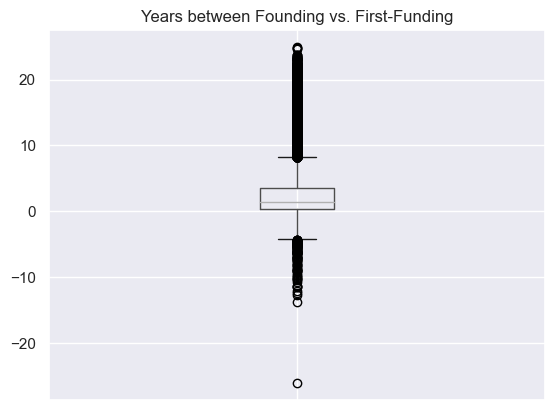

In [162]:
sns.set_theme(style="darkgrid")

startup_df.loc[startup_df['founded_year'] > 1990,['year_to_first_funding']].rename(columns = {'year_to_first_funding': ''}).boxplot()

plt.title('Years between Founding vs. First-Funding') 
# plt.legend()

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Total Funding vs. Rounds of Funding')

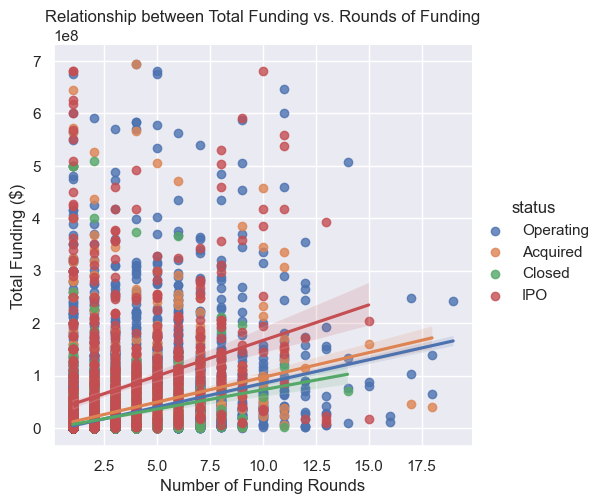

In [15]:
# relationship between funding_rounds and funding_total_usd

startup_df
sns.set_theme(style="darkgrid")
 
sns.lmplot(x="funding_rounds",
                    y="funding_total_usd",
                    hue="status",
                    #style="event",
                    data=startup_df.loc[(startup_df['funding_total_usd'] < 700000000) & (startup_df['country_name'] == 'United States'),:])

plt.xlabel("Number of Funding Rounds")
plt.ylabel("Total Funding ($)")
plt.title("Relationship between Total Funding vs. Rounds of Funding") 


Text(0.5, 1.0, 'Relationship between Rounds of Funding vs. Startup Status')

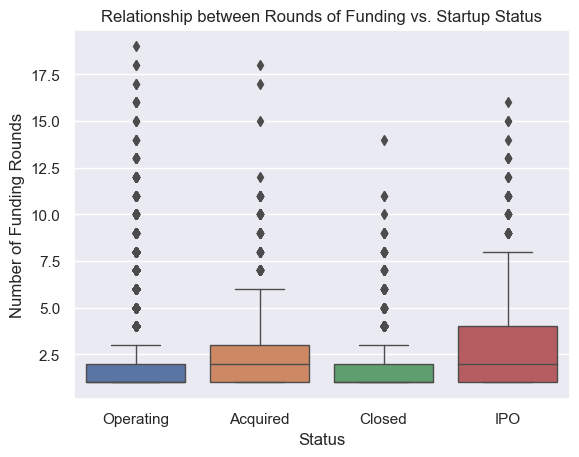

In [16]:
sns.set_theme(style="darkgrid")

sns.boxplot(x = 'status', y = 'funding_rounds', 
                data = startup_df,
                linewidth=1)

plt.xlabel("Status")
plt.ylabel("Number of Funding Rounds")
plt.title("Relationship between Rounds of Funding vs. Startup Status") 


Text(0.5, 1.0, 'Relationship between Total Funding vs. Startup Status')

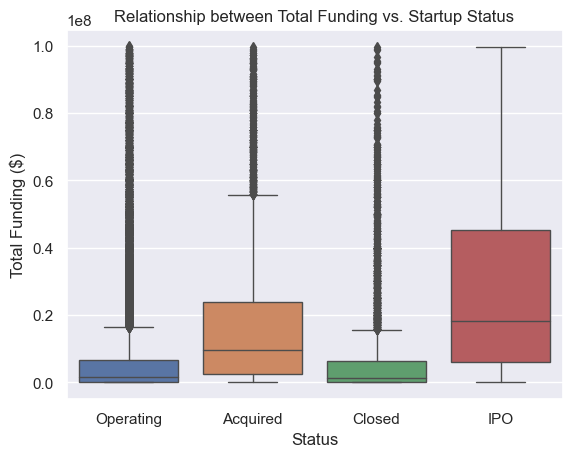

In [17]:
sns.set_theme(style="darkgrid")

sns.boxplot(x = 'status', y = 'funding_total_usd', 
                data = startup_df.loc[startup_df['funding_total_usd'] < 100000000,],
                linewidth=1)

plt.xlabel("Status")
plt.ylabel("Total Funding ($)")
plt.title("Relationship between Total Funding vs. Startup Status") 


Text(0.5, 1.0, 'Frequency of each Status within Startups')

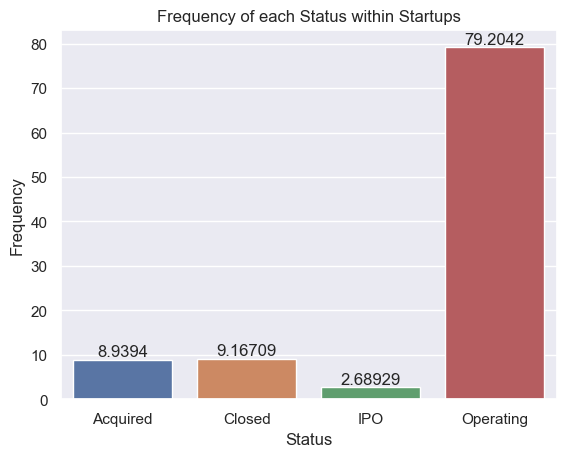

In [18]:
# percentage of each status for all companies
sns.set_theme(style="darkgrid")


status_group = startup_df.groupby('status')[['permalink']].count().reset_index().assign(total = 53583)
status_group = status_group.assign(status_percentage = (status_group['permalink'] / status_group['total']) * 100)
status_group

ax = sns.barplot(data = status_group, x = 'status',  y = 'status_percentage')
for i in ax.containers:
    ax.bar_label(i,)

    
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.title("Frequency of each Status within Startups") 


<Axes: ylabel='country_name'>

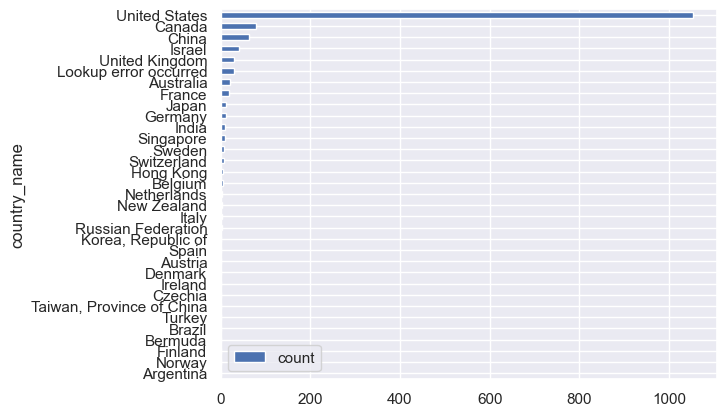

In [19]:
# What countries were part of the IPO companies
sns.set_theme(style="darkgrid")

status_country_group = startup_df.loc[startup_df['status'] == 'IPO', :].groupby(['status','country_name'])[['permalink']].count().reset_index().rename(columns={'permalink': 'count'}).sort_values(by = 'count')
#status_group = status_group.assign(status_percentage = (status_group['permalink'] / status_group['total']) * 100)
status_country_group.plot.barh(x = 'country_name', y = 'count')



<Axes: xlabel='first_funding_year', ylabel='max'>

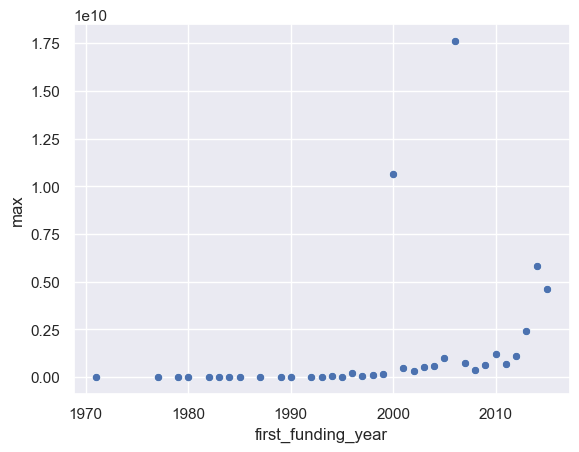

In [20]:
#max first rounds of funding over years
sns.set_theme(style="darkgrid")

startup_df.loc[startup_df['funding_rounds'] == 1 , :].groupby('first_funding_year')['funding_total_usd'].agg(['mean','max','sum']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='max')

In [21]:
startup_df.loc[startup_df['funding_rounds'] == 1 , :].groupby('first_funding_year')['funding_total_usd'].agg(['mean','max','sum'])

mean           max           sum
first_funding_year                                          
1971.0              5.490000e+05  5.490000e+05  5.490000e+05
1977.0              2.500000e+05  2.500000e+05  2.500000e+05
1979.0              1.000000e+06  1.000000e+06  1.000000e+06
1980.0              9.000000e+06  9.000000e+06  9.000000e+06
1982.0              3.480000e+05  7.240000e+05  1.044000e+06
1983.0              9.400000e+04  9.400000e+04  9.400000e+04
1984.0              1.050000e+06  2.000000e+06  2.100000e+06
1985.0              3.593333e+05  6.660000e+05  1.078000e+06
1987.0              1.488000e+06  2.500000e+06  2.976000e+06
1989.0              5.075000e+05  1.000000e+06  1.015000e+06
1990.0              1.000000e+06  1.000000e+06  1.000000e+06
1992.0              1.805000e+05  4.980000e+05  7.220000e+05
1993.0              1.250000e+05  1.250000e+05  1.250000e+05
1994.0              8.027143e+06  5.000000e+07  5.619000e+07
1995.0              1.900000e+07  3.000000e+07  3.800000e+07
1996.0              6.374741e+07  2.430682e+08  3.187371e+08
1997.0              1.295000e+07  4.100000e+07  5.180000e+07
1998.0              1.857525e+07  1.200000e+08  1.486020e+08
1999.0              1.645230e+07  1.750000e+08  2.319774e+09
2000.0              8.605112e+07  1.066494e+10  1.609156e+10
2001.0              1.743690e+07  5.000000e+08  5.353128e+09
2002.0              2.044906e+07  3.250000e+08  4.560140e+09
2003.0              1.909270e+07  5.500000e+08  7.007022e+09
2004.0              2.018997e+07  6.000000e+08  7.127060e+09
2005.0              1.309552e+07  1.000000e+09  8.066842e+09
2006.0              3.275896e+07  1.760000e+10  2.610889e+10
2007.0              1.100019e+07  7.500000e+08  1.324423e+10
2008.0              9.150099e+06  3.900000e+08  1.063242e+10
2009.0              7.088716e+06  6.170000e+08  1.134903e+10
2010.0              9.213881e+06  1.200000e+09  1.930308e+10
2011.0              5.362183e+06  6.817591e+08  1.303010e+10
2012.0              3.675178e+06  1.100000e+09  1.088955e+10
2013.0              6.994753e+06  2.400000e+09  3.140644e+10
2014.0              1.118643e+07  5.800000e+09  7.044093e+10
2015.0              9.533135e+06  4.630000e+09  5.249898e+10

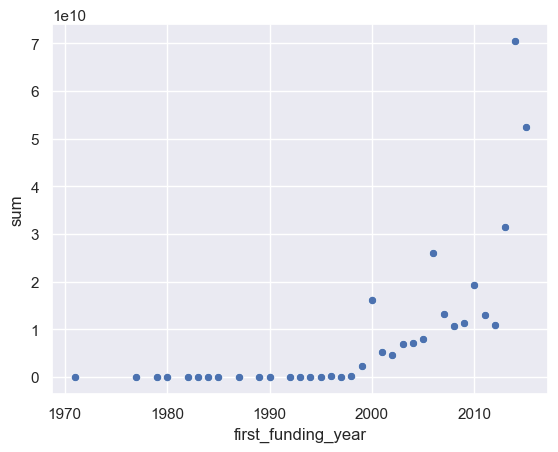

In [22]:
startup_df.loc[startup_df['funding_rounds'] == 1 , :].groupby('first_funding_year')['funding_total_usd'].agg(['mean','max','sum']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='sum')
sns.set_theme(style="darkgrid")


<Axes: xlabel='first_funding_year', ylabel='mean'>

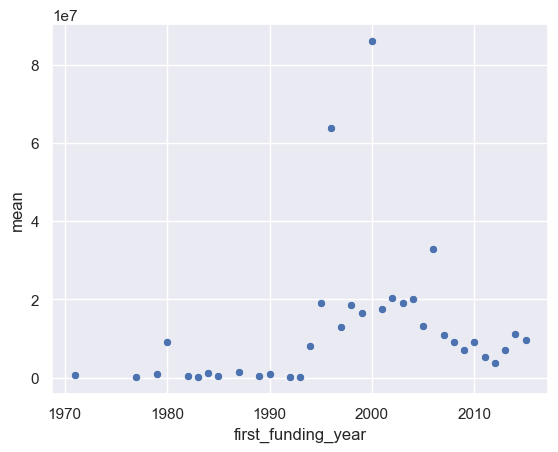

In [23]:
#average first rounds of funding over years

sns.set_theme(style="darkgrid")

startup_df.loc[startup_df['funding_rounds'] == 1 , :].groupby('first_funding_year')['funding_total_usd'].agg(['mean','max','sum']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='mean')



#founded_startup_df.groupby('founded_year')['funding_total_usd'].agg(['mean','sum','max'])

<Axes: xlabel='first_funding_year', ylabel='mean'>

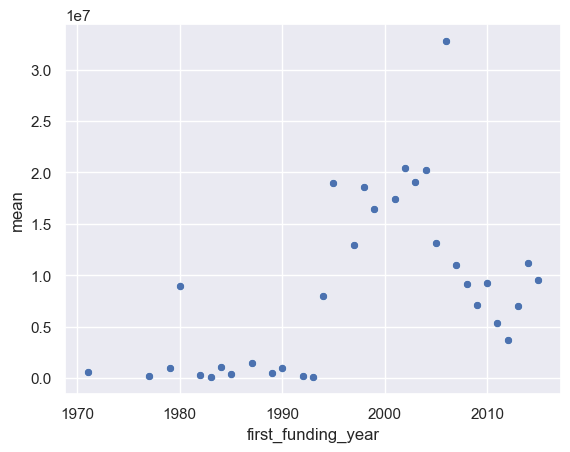

In [24]:
#same plot but without outliers: average first rounds of funding over years

sns.set_theme(style="darkgrid")

startup_df_agg = startup_df.loc[startup_df['funding_rounds'] == 1 , :].groupby('first_funding_year')['funding_total_usd'].agg(['mean','max','sum'])
startup_df_agg.loc[startup_df_agg['mean'] < 40000000, :].pipe((sns.scatterplot, 'data'), x='first_funding_year', y='mean')



#founded_startup_df.groupby('founded_year')['funding_total_usd'].agg(['mean','sum','max'])

Text(0.5, 1.0, 'Number of Companies Receiving First Funding Round each Month')

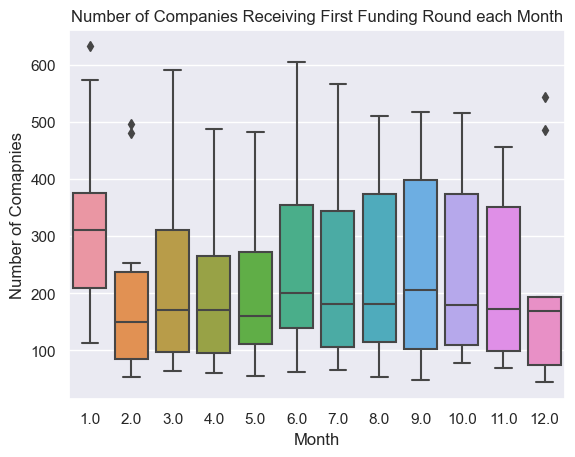

In [25]:
sns.set_theme(style="darkgrid")

startup_df_agg_month = startup_df.loc[startup_df['funding_rounds'] == 1 , :].groupby(['first_funding_year','first_funding_month'])[['funding_total_usd']].count().rename(columns = {'funding_total_usd': 'count'}).reset_index()
startup_df_agg_month.loc[ startup_df_agg_month['first_funding_year'] > 2005, :].pipe((sns.boxplot, 'data'), x='first_funding_month', y='count')

    
plt.xlabel("Month")
plt.ylabel("Number of Comapnies")
plt.title("Number of Companies Receiving First Funding Round each Month") 


In [26]:
#startup_df_agg_month



Text(0.5, 1.0, 'Relationship between Rounds of Funding vs. Startup Status')

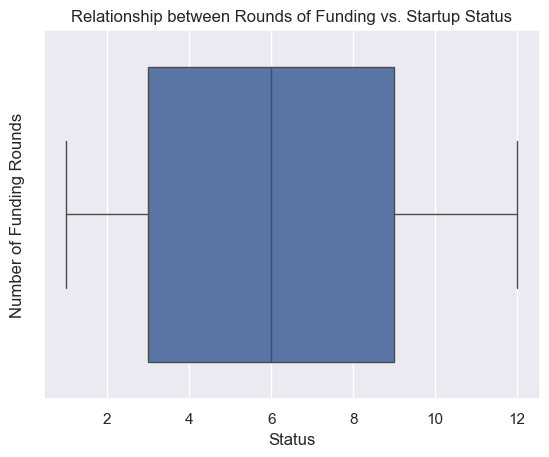

In [27]:

sns.boxplot(x = 'first_funding_month', 
                data = startup_df,
                linewidth=1)

plt.xlabel("Status")
plt.ylabel("Number of Funding Rounds")
plt.title("Relationship between Rounds of Funding vs. Startup Status") 


<Axes: xlabel='founded_year', ylabel='count'>

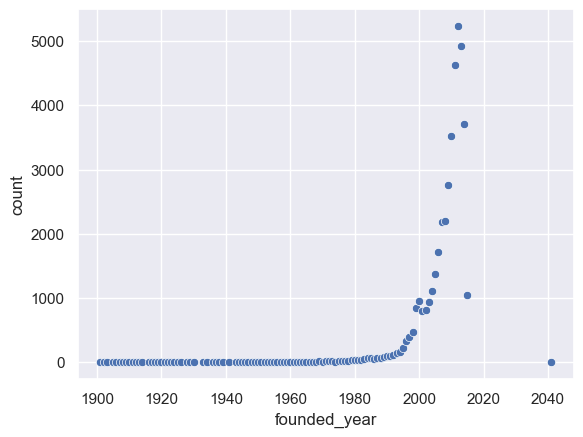

In [28]:
sns.set_theme(style="darkgrid")

startup_df.groupby('founded_year')['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count')
# yeas vs. number of companies created

count
founded_year       
2006.0         1712
2007.0         2191
2008.0         2201
2009.0         2762
2010.0         3524
2011.0         4628
2012.0         5232
2013.0         4931
2014.0         3708
2015.0         1052

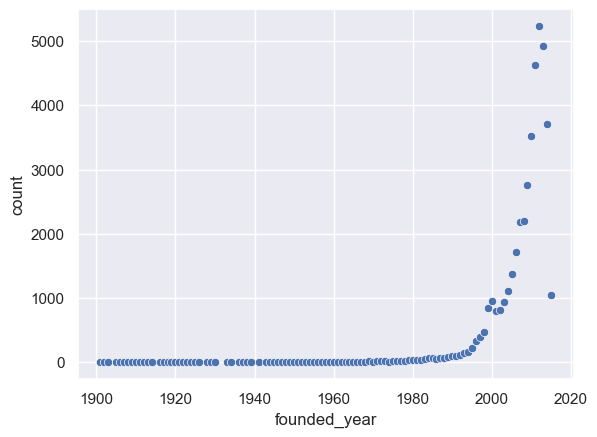

In [29]:
# number of companies founded over time
sns.set_theme(style="darkgrid")

startup_df.loc[startup_df['founded_year'] < 2024, :].groupby('founded_year')['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count')
# dataframe showning drop in count after 2012
startup_df.loc[(startup_df['founded_year'] < 2024) & (startup_df['founded_year'] > 2005), :].groupby('founded_year')['permalink'].agg(['count'])

<Axes: xlabel='founded_year', ylabel='count'>

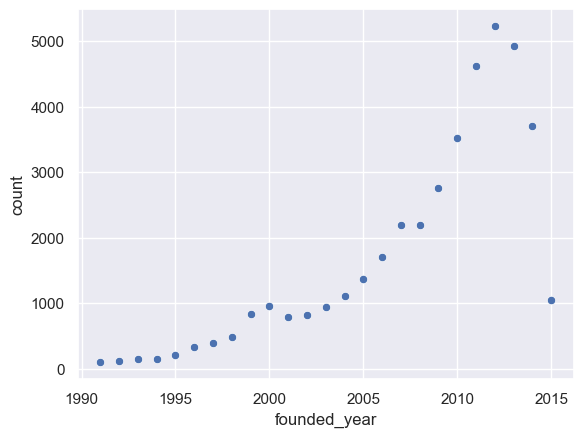

In [30]:
# companies founded between 1990 to 2015
sns.set_theme(style="darkgrid")
startup_df.loc[(startup_df['founded_year'] < 2024) & (startup_df['founded_year'] > 1990) , :].groupby('founded_year')['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count')


In [31]:


fig = px.choropleth(startup_df.loc[startup_df['country_name'] != 'Lookup error occurred',:].groupby(['country_name','country_code'])[['permalink']].count().rename(columns = {'permalink': 'count'}).sort_values(by = 'count',ascending=False).reset_index(),
                    locations="country_code",
                    locationmode='ISO-3',
                    color="count", 
                    hover_name="country_name",
                    color_continuous_scale=px.colors.sequential.thermal)

fig.show()

In [32]:
fig = px.choropleth(startup_df.loc[(startup_df['country_name'] != 'Lookup error occurred') & (startup_df['country_name'] != 'United States'),:].groupby(['country_name','country_code'])[['permalink']].count().rename(columns = {'permalink': 'count'}).sort_values(by = 'count',ascending=False).reset_index(),
                    locations="country_code",
                    locationmode='ISO-3',
                    color="count", 
                    hover_name="country_name",
                    color_continuous_scale=px.colors.sequential.thermal)

fig.show()

In [33]:
startup_df.loc[(startup_df['country_name'] != 'Lookup error occurred') & (startup_df['country_name'] == 'United States'),:].groupby(['country_name','country_code','city'])[['permalink']].count().rename(columns = {'permalink': 'count'}).sort_values(by = 'count',ascending=False).reset_index()

country_name country_code               city  count
0     United States          USA      San Francisco   2994
1     United States          USA           New York   2703
2     United States          USA            Seattle    683
3     United States          USA             Austin    666
4     United States          USA          Palo Alto    648
...             ...          ...                ...    ...
2193  United States          USA  Linthicum Heights      1
2194  United States          USA             Linden      1
2195  United States          USA            Lindale      1
2196  United States          USA           Lincroft      1
2197  United States          USA         Zionsville      1

[2198 rows x 4 columns]

In [34]:
import json
# Opening JSON file
f = open('cities.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()
data
# # Iterating through the json
# # list
# for i in data['latitude']:
#      print(i)
 
# # Closing file
# f.close()

[{'city': 'New York',
  'growth_from_2000_to_2013': '4.8%',
  'latitude': 40.7127837,
  'longitude': -74.0059413,
  'population': '8405837',
  'rank': '1',
  'state': 'New York'},
 {'city': 'Los Angeles',
  'growth_from_2000_to_2013': '4.8%',
  'latitude': 34.0522342,
  'longitude': -118.2436849,
  'population': '3884307',
  'rank': '2',
  'state': 'California'},
 {'city': 'Chicago',
  'growth_from_2000_to_2013': '-6.1%',
  'latitude': 41.8781136,
  'longitude': -87.6297982,
  'population': '2718782',
  'rank': '3',
  'state': 'Illinois'},
 {'city': 'Houston',
  'growth_from_2000_to_2013': '11.0%',
  'latitude': 29.7604267,
  'longitude': -95.3698028,
  'population': '2195914',
  'rank': '4',
  'state': 'Texas'},
 {'city': 'Philadelphia',
  'growth_from_2000_to_2013': '2.6%',
  'latitude': 39.9525839,
  'longitude': -75.1652215,
  'population': '1553165',
  'rank': '5',
  'state': 'Pennsylvania'},
 {'city': 'Phoenix',
  'growth_from_2000_to_2013': '14.0%',
  'latitude': 33.4483771,
  '

In [35]:

fig = px.choropleth(startup_df.loc[(startup_df['country_name'] != 'Lookup error occurred') & (startup_df['country_name'] == 'United States'),:].groupby(['country_name','country_code','city'])[['permalink']].count().rename(columns = {'permalink': 'count'}).sort_values(by = 'count',ascending=False).reset_index(),
                           geojson=data, locations='city', color='count',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'startup_count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


<Axes: ylabel='country_name'>

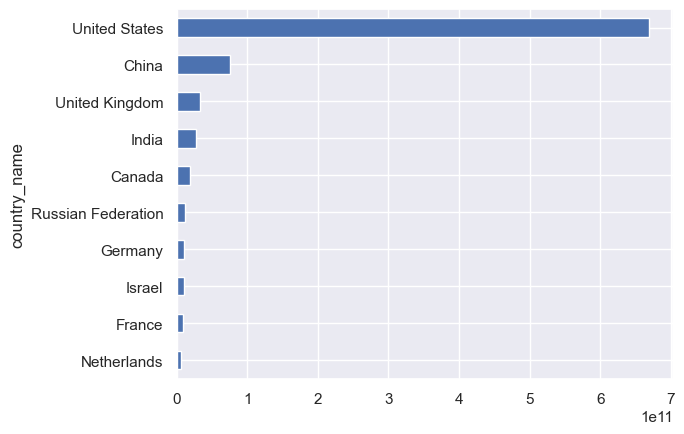

In [36]:
sns.set_theme(style="darkgrid")
country_total_funding= startup_df.loc[startup_df['country_name'] != 'Lookup error occurred',:]
country_total_funding = country_total_funding.groupby('country_name')['funding_total_usd'].agg(['sum','count'])
country_total_funding['total_funding_per_company'] = country_total_funding['sum'] / country_total_funding['count']

# total funding (summed) per country
country_total_funding.loc[:,'sum'].sort_values().tail(10).plot.barh()

In [37]:
country_total_funding.head(100)

sum  count  total_funding_per_company
country_name                                                      
Albania             2.767441e+05      1               2.767441e+05
Algeria             3.788120e+05      1               3.788120e+05
Argentina           3.623555e+08    170               2.131503e+06
Armenia             2.681750e+07      3               8.939167e+06
Australia           3.839237e+09    421               9.119327e+06
...                          ...    ...                        ...
Puerto Rico         1.499901e+06      3               4.999670e+05
Qatar               1.560000e+05      1               1.560000e+05
Russian Federation  1.127912e+10    414               2.724425e+07
Rwanda              2.710000e+05      2               1.355000e+05
Saint Barthélemy    3.500000e+05      1               3.500000e+05

[100 rows x 3 columns]

<Axes: ylabel='country_name'>

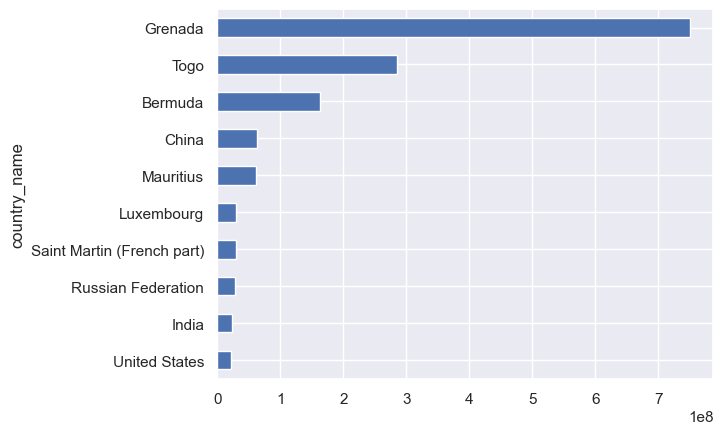

In [38]:
# total funding normalized by number of companies per country

sns.set_theme(style="darkgrid")
country_total_funding.loc[:,'total_funding_per_company'].sort_values().tail(10).plot.barh()

<Axes: ylabel='country_name'>

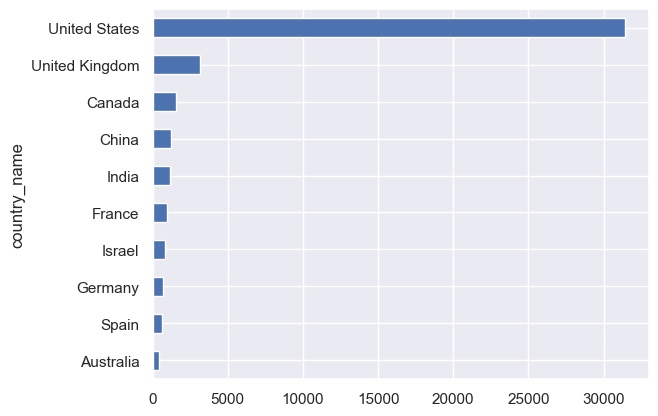

In [39]:

# total number of companies per country
sns.set_theme(style="darkgrid")
country_total_funding.loc[:,'count'].sort_values().tail(10).plot.barh()

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



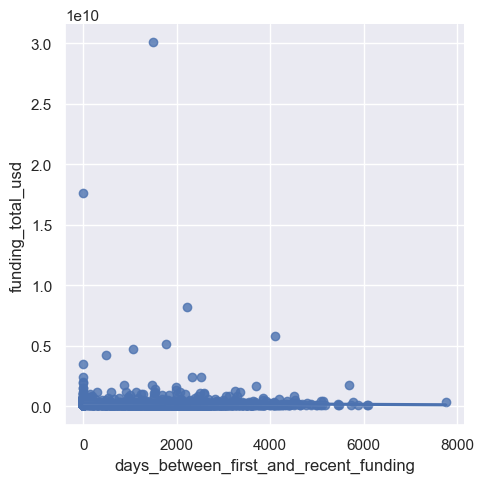

In [40]:
sns.set_theme(style="darkgrid")
usa_df = startup_df.loc[startup_df['country_code'] == 'USA', :]
#relationship of duration betweenfirst and recont fundings vs. total funding for top 95% percentile
#sns.lmplot(x = "days_between_first_and_recent_funding", y = "funding_total_usd", data = usa_df)
sns.lmplot(x = "days_between_first_and_recent_funding", y = "funding_total_usd", data = usa_df.loc[usa_df['funding_total_usd'] > usa_df['funding_total_usd'].quantile(0.95),:])

<Axes: ylabel='city'>

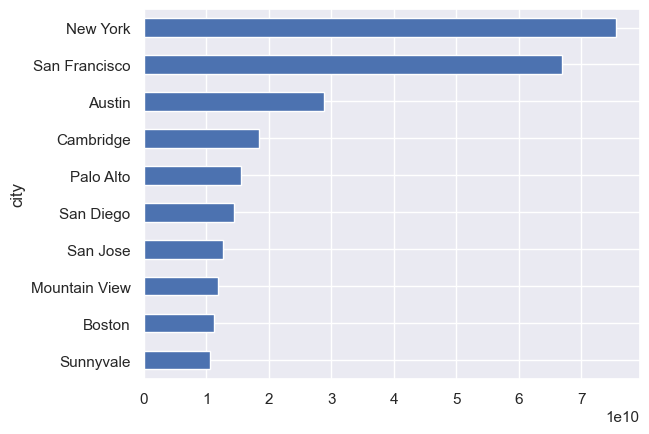

In [41]:
sns.set_theme(style="darkgrid")
usa_city_df= usa_df.groupby('city')['funding_total_usd'].agg(['sum','count'])
usa_city_df['total_funding_per_company'] = usa_city_df['sum'] / usa_city_df['count']
usa_city_df.loc[:,'sum'].sort_values().tail(10).plot.barh()
# total funding (summed) per city

<Axes: ylabel='city'>

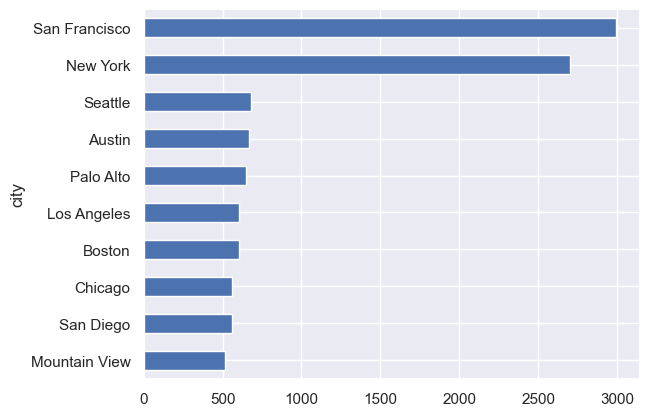

In [42]:
# count of comapnies per city
sns.set_theme(style="darkgrid")
usa_city_df.loc[:,'count'].sort_values().tail(10).plot.barh()

<Axes: ylabel='city'>

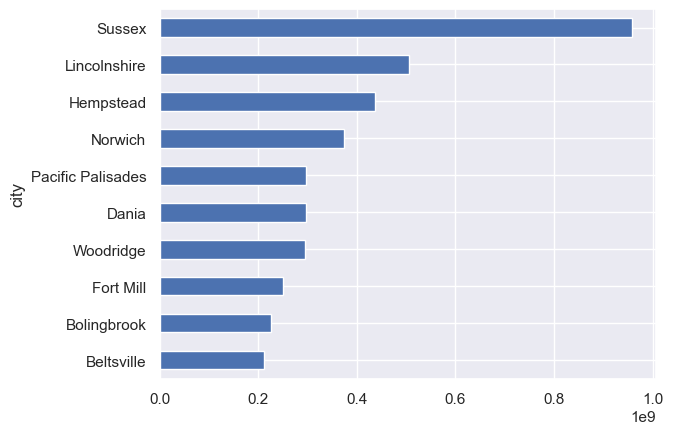

In [43]:
sns.set_theme(style="darkgrid")
usa_city_df.loc[:,'total_funding_per_company'].sort_values().tail(10).plot.barh()

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract



<Axes: >

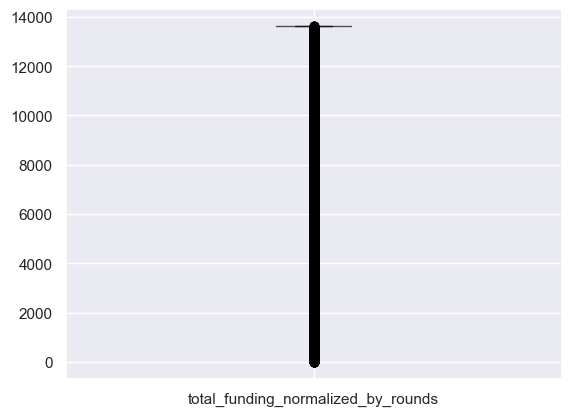

In [44]:
sns.set_theme(style="darkgrid")
startup_df.boxplot(column= 'total_funding_normalized_by_rounds')

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



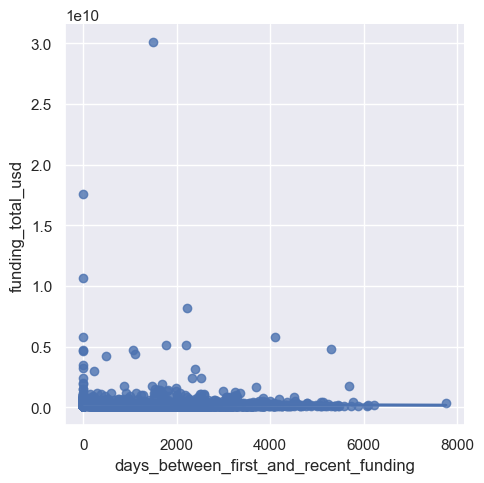

In [45]:
#relationship of duration betweenfirst and recont fundings vs. total funding for top 95% percentile
sns.set_theme(style="darkgrid")
sns.lmplot(x = "days_between_first_and_recent_funding", y = "funding_total_usd", data = startup_df.loc[startup_df['funding_total_usd'] > startup_df['funding_total_usd'].quantile(0.95),:])

In [46]:
top_90 = startup_df['funding_total_usd'].quantile(0.90)
top_95 = startup_df['funding_total_usd'].quantile(0.95)
top_99 = startup_df['funding_total_usd'].quantile(0.99)

startup_df.loc[startup_df['funding_total_usd'] > startup_df['funding_total_usd'].quantile(0.99),:].head()


permalink                   name  \
138  /organization/21st-century-oncology  21st Century Oncology   
139               /organization/21vianet               21viaNet   
144                /organization/23andme                23andMe   
372                  /organization/4info                  4INFO   
436                 /organization/58-com                 58.com   

                       homepage_url  \
138  http://21stcenturyoncology.com   
139      http://www.ch.21vianet.com   
144              http://23andme.com   
372            http://www.4info.com   
436               http://www.58.com   

                                         category_list  funding_total_usd  \
138                                Health and Wellness        325000000.0   
139                               Software|Web Hosting        396000000.0   
144                               Biotechnology|Search        227049900.0   
372  Ad Targeting|Big Data Analytics|Mobile Adverti...        320288000.0   
436                      Curated Web|Internet|Software        876780000.0   

        status country_code state_code       region           city  \
138  Operating          USA         FL   Fort Myers     Fort Myers   
139        IPO          CHN         22      Beijing        Beijing   
144  Operating          USA         CA  SF Bay Area  Mountain View   
372  Operating          USA         CA  SF Bay Area      San Mateo   
436        IPO          CHN         19  CHN - Other       Chaoyang   

     funding_rounds founded_at first_funding_at last_funding_at  founded_year  \
138               1        NaT       2014-09-26      2014-09-26           NaN   
139               5 2009-10-16       2008-02-13      2014-12-04        2009.0   
144               8 2006-04-01       2005-11-02      2015-07-03        2006.0   
372               8 2004-09-08       2005-03-01      2014-08-01        2004.0   
436               6 2005-01-01       2006-02-01      2014-06-27        2005.0   

     first_funding_year  last_funding_year  founded_month  \
138              2014.0             2014.0            NaN   
139              2008.0             2014.0           10.0   
144              2005.0             2015.0            4.0   
372              2005.0             2014.0            9.0   
436              2006.0             2014.0            1.0   

     first_funding_month  last_funding_month  days_to_first_funding  \
138                  9.0                 9.0                    NaN   
139                  2.0                12.0                 -611.0   
144                 11.0                 7.0                 -150.0   
372                  3.0                 8.0                  174.0   
436                  2.0                 6.0                  396.0   

     days_between_first_and_recent_funding  \
138                                    0.0   
139                                 2486.0   
144                                 3530.0   
372                                 3440.0   
436                                 3068.0   

     days_between_founding_and_recent_funding  year_to_first_funding  \
138                                       NaN                    NaN   
139                                    1875.0              -1.673973   
144                                    3380.0              -0.410959   
372                                    3614.0               0.476712   
436                                    3464.0               1.084932   

     year_between_first_and_recent_funding  \
138                               0.000000   
139                               6.810959   
144                               9.671233   
372                               9.424658   
436                               8.405479   

     years_between_founding_and_recent_funding  \
138                                        NaN   
139                                   5.136986   
144                                   9.260274   
372                                   9.9

<Axes: title={'center': 'funding_total_usd'}, xlabel='category_list'>

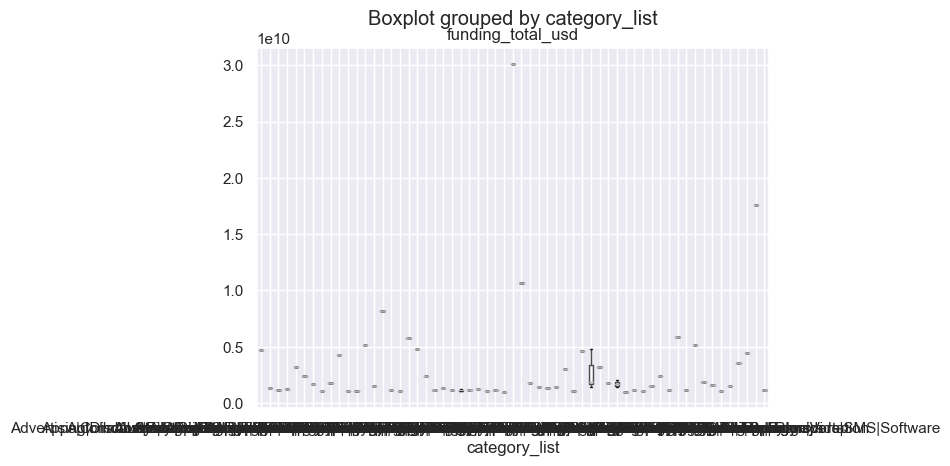

In [47]:
# unicorn box plot
startup_df.loc[startup_df['funding_total_usd'] > 1000000000,:].sort_values(by = 'funding_total_usd').boxplot(column = 'funding_total_usd', by = 'category_list')

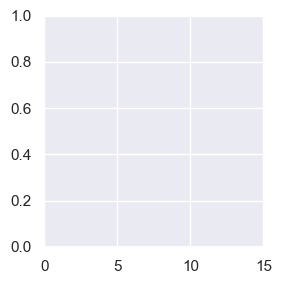

In [48]:
sns.set_theme(style="darkgrid")

sns.displot(startup_df.loc[(startup_df['year_between_first_and_recent_funding'] < 20) & (startup_df['status'] == 'ipo') | (startup_df['status'] == 'acquired'),:], x='year_between_first_and_recent_funding', col='status',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True)
).set(xlim=(0, 15))
#Years ipo/acquired startups reached final round of funding

In [49]:
startup_df_categories = startup_df.copy()
startup_df_categories['category_list'] = startup_df_categories['category_list'].apply(lambda x: x.split('|'))

# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in startup_df_categories['category_list']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
category_list = pd.DataFrame(list_, columns = ['index', 'category_list'])
category_list.head(15) 
#df_genre.genres

startup_df_categories = pd.merge(startup_df_categories.drop('category_list', axis = 1), category_list, how = 'right', left_index = True, right_on = 'index')
print(startup_df_categories.shape)
startup_df_categories.head()



(129282, 29)


permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2               /organization/-qounter                :Qounter   
3               /organization/-qounter                :Qounter   
4  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   

             homepage_url  funding_total_usd     status country_code  \
0      http://livfame.com         10000000.0  Operating          IND   
1  http://www.qounter.com           700000.0  Operating          USA   
2  http://www.qounter.com           700000.0  Operating          USA   
3  http://www.qounter.com           700000.0  Operating          USA   
4     http://oneofthem.jp          3406878.0  Operating          NaN   

  state_code      region           city  funding_rounds founded_at  \
0         16      Mumbai         Mumbai             1.0        NaT   
1         DE  DE - Other  Delaware City             2.0 2014-09-04   
2         DE  DE - Other  Delaware City             2.0 2014-09-04   
3         DE  DE - Other  Delaware City             2.0 2014-09-04   
4        NaN         NaN            NaN             1.0        NaT   

  first_funding_at last_funding_at  founded_year  first_funding_year  \
0       2015-01-05      2015-01-05           NaN              2015.0   
1       2014-03-01      2014-10-14        2014.0              2014.0   
2       2014-03-01      2014-10-14        2014.0              2014.0   
3       2014-03-01      2014-10-14        2014.0              2014.0   
4       2014-01-30      2014-01-30           NaN              2014.0   

   last_funding_year  founded_month  first_funding_month  last_funding_month  \
0             2015.0            NaN                  1.0                 1.0   
1             2014.0            9.0                  3.0                10.0   
2             2014.0            9.0                  3.0                10.0   
3             2014.0            9.0                  3.0                10.0   
4             2014.0            NaN                  1.0                 1.0   

   days_to_first_funding  days_between_first_and_recent_funding  \
0                    NaN                                    0.0   
1                 -187.0                                  227.0   
2                 -187.0                                  227.0   
3                 -187.0                                  227.0   
4                    NaN                                    0.0   

   days_between_founding_and_recent_funding  year_to_first_funding  \
0                                       NaN                    NaN   
1                                      40.0              -0.512329   
2                                      40.0              -0.512329   
3                                      40.0              -0.512329   
4                                       NaN                    NaN   

   year_between_first_and_recent_funding  \
0                               0.000000   
1                               0.621918   
2                               0.621918   
3                               0.621918   
4                               0.000000   

   years_between_founding_and_recent_funding  \
0                                        NaN   
1                                   0.109589   
2                                   0.109589   
3                                   0.109589   
4                                        NaN   

   total_funding_normalized_by_rounds           country_name  index  \
0                                 inf                  India      0   
1                         3083.700441          United States      1   
2                         3083.700441          United States      1   
3                         3083.700441          United States      1   
4                                 inf  Lookup error occurred      2   

           category_list  
0                  Media  
1  Ap

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning:

invalid value encountered in subtract



<Axes: xlabel='category_list', ylabel='total_funding_normalized_by_rounds'>

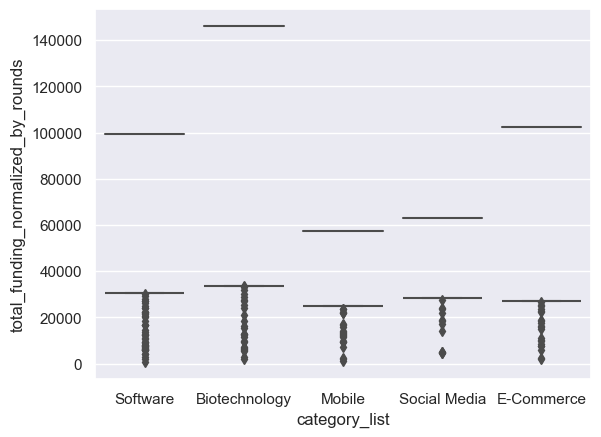

In [50]:
sns.boxplot(data = startup_df_categories.loc[(startup_df_categories['status'].isin(['IPO']))\
                                                                   & (startup_df_categories['category_list'].isin(['Software', 'Biotechnology', 'Mobile','E-Commerce','Social Media'])),:]\
            , x = 'category_list', y = 'total_funding_normalized_by_rounds')

Text(0.5, 1.0, 'Industries with Highest Number of Companies')

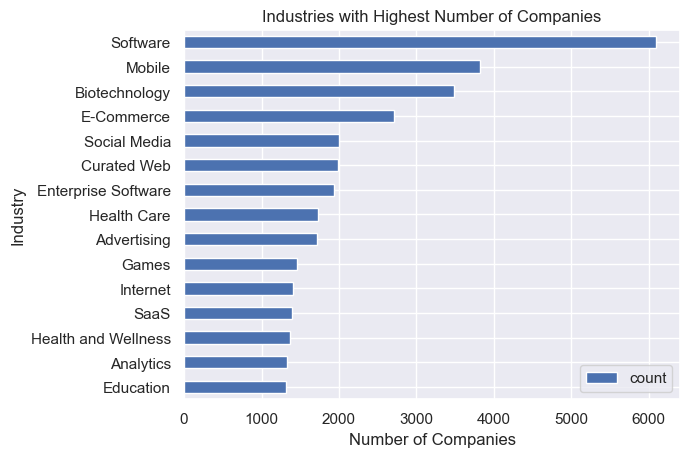

In [51]:
sns.set_theme(style="darkgrid")

startup_df_categories.groupby('category_list')[['permalink']].count().rename(columns= {'permalink': 'count'}).sort_values(by = 'count',ascending=True).reset_index().tail(15).plot.barh('category_list','count',color = 'b')
#largest number of startups from categories


plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.title("Industries with Highest Number of Companies") 



Text(0, 0.5, 'Funding Total (USD)')

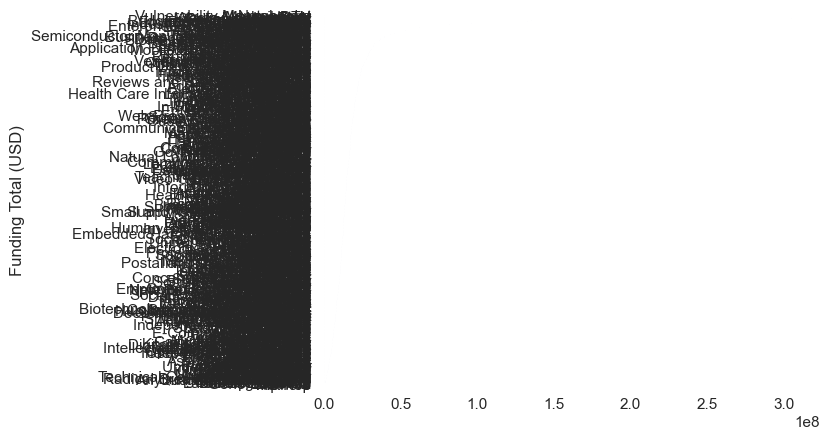

In [52]:
startup_df_categories.groupby('category_list')['funding_total_usd'].mean().sort_values(ascending = True).plot.barh(color = 'b')
plt.ylabel('Funding Total (USD)')

<Axes: ylabel='category_list'>

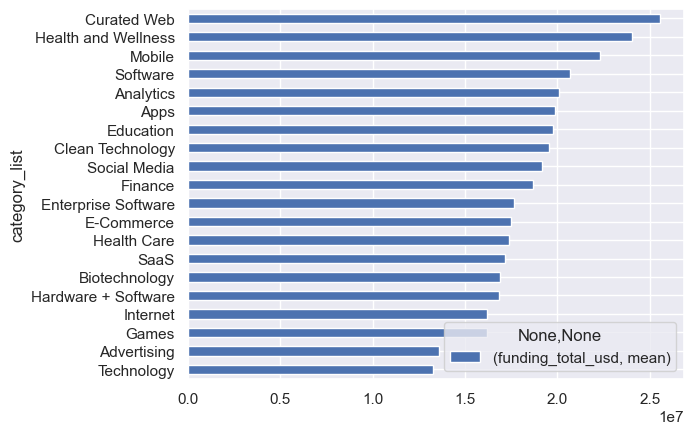

In [53]:
average_count_funding_categories = startup_df_categories.groupby('category_list')[['funding_total_usd']].agg(['mean','count']).sort_values(by = [('funding_total_usd', 'mean')] ,ascending = True).reset_index()
average_count_funding_categories.loc[average_count_funding_categories[('funding_total_usd', 'count')] > 1000,:].tail(20).plot.barh('category_list', [('funding_total_usd', 'mean')], color = 'b')
#plt.ylabel('')
# Average Total Funding for Categories that have at least n number of companies

In [54]:
startup_df_categories_counts = pd.merge(startup_df_categories,\
                                     startup_df_categories.groupby('category_list')[['permalink']].count().rename(columns = {'permalink': 'count'}),\
                                     on = 'category_list')
top_20_startup_df_categories_counts= startup_df_categories_counts.loc[startup_df_categories_counts['count'] >= 1100, :]
top_5_startup_df_categories_counts= startup_df_categories_counts.loc[startup_df_categories_counts['count'] >= 1994, :]
top_5_startup_df_categories_counts.columns


Index(['permalink', 'name', 'homepage_url', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at', 'founded_year',
       'first_funding_year', 'last_funding_year', 'founded_month',
       'first_funding_month', 'last_funding_month', 'days_to_first_funding',
       'days_between_first_and_recent_funding',
       'days_between_founding_and_recent_funding', 'year_to_first_funding',
       'year_between_first_and_recent_funding',
       'years_between_founding_and_recent_funding',
       'total_funding_normalized_by_rounds', 'country_name', 'index',
       'category_list', 'count'],
      dtype='object')

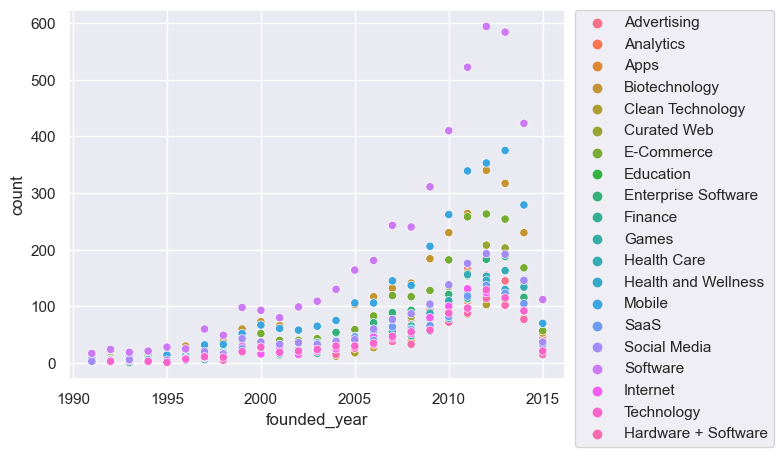

In [55]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_20_startup_df_categories_counts.loc[(top_20_startup_df_categories_counts['founded_year'] < 2024) & (top_20_startup_df_categories_counts['founded_year'] > 1990) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count', hue = 'category_list')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



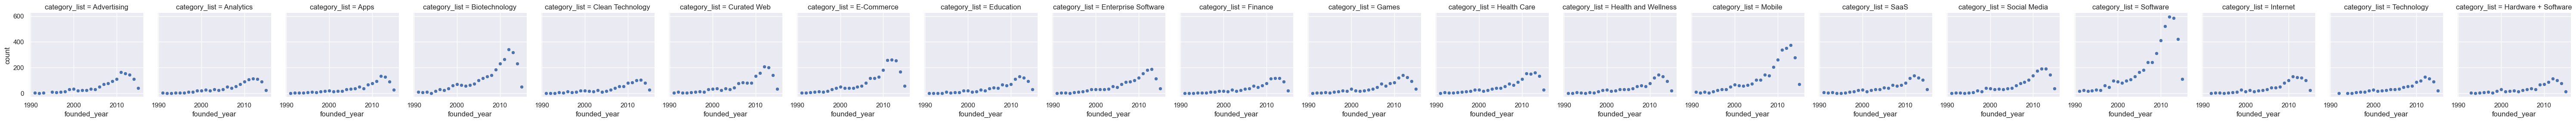

In [56]:

#same plot but facet grid by category_list
g = sns.FacetGrid(top_20_startup_df_categories_counts.loc[(top_20_startup_df_categories_counts['founded_year'] < 2024) & (top_20_startup_df_categories_counts['founded_year'] > 1990) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index(),\
                  col = 'category_list', palette = "Set3")
g.map(sns.scatterplot,'founded_year','count')

<Axes: xlabel='founded_year', ylabel='count'>

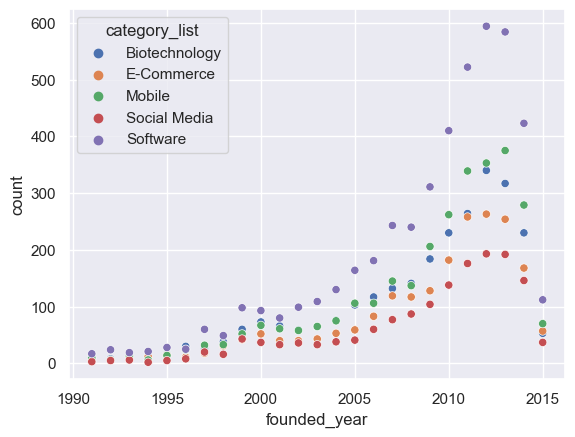

In [57]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['founded_year'] < 2024) & (top_20_startup_df_categories_counts['founded_year'] > 1990) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count', hue = 'category_list')


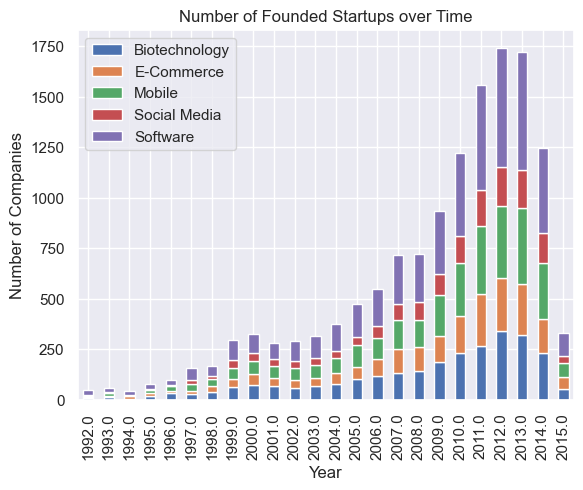

In [58]:
top_5_startup_df_categories_counts_pivot = top_5_startup_df_categories_counts.groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index()\
.pivot(index = 'founded_year',columns = 'category_list',values = 'count').reset_index()
top_5_startup_df_categories_counts_pivot.loc[(top_5_startup_df_categories_counts_pivot['founded_year'] < 2024) & (top_5_startup_df_categories_counts_pivot['founded_year'] > 1991) , :]\
.rename(columns = {'category_list': 'Industry'})\
.plot(kind = 'bar', x = 'founded_year', stacked = True)

plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of Founded Startups over Time") 
plt.legend()

<Axes: xlabel='founded_year', ylabel='count'>

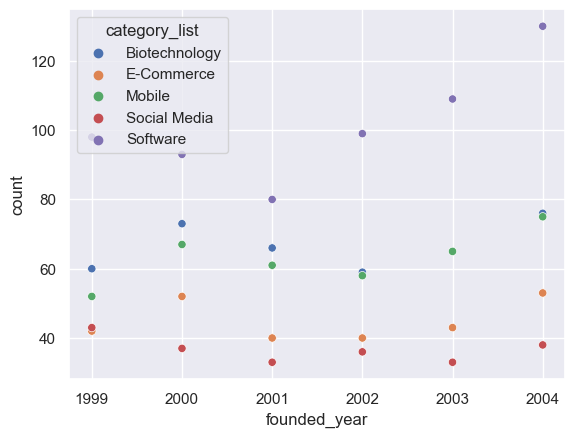

In [59]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['founded_year'] < 2005) & (top_20_startup_df_categories_counts['founded_year'] > 1998) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index().pipe((sns.scatterplot, 'data'), x='founded_year', y='count', hue = 'category_list')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



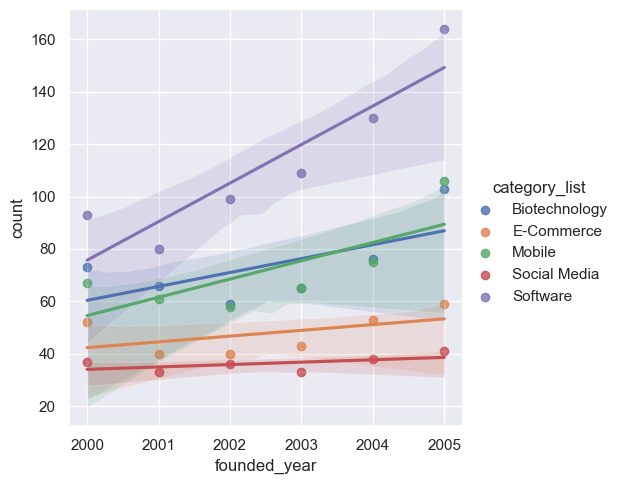

In [60]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['founded_year'] <= 2005) & (top_20_startup_df_categories_counts['founded_year'] >= 2000) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index().pipe((sns.lmplot, 'data'), x='founded_year', y='count', hue = 'category_list')


In [61]:
top_5_startup_df_categories_counts_summ = top_5_startup_df_categories_counts.groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index()

top_5_categories = top_5_startup_df_categories_counts_summ.category_list.unique()



def slopecalc(year1,year2):
    slope = {}
    for i in top_5_categories:
        sub = top_5_startup_df_categories_counts_summ.loc[(top_5_startup_df_categories_counts_summ['category_list'] == i) &\
                                                          (top_5_startup_df_categories_counts_summ['founded_year'] >= year1) &\
                                                          (top_5_startup_df_categories_counts_summ['founded_year'] <= year2), :]
        slope[i]= stats.linregress(sub['founded_year'], sub['count'])[0]
    return slope






In [62]:

start_year = 1995
end_year = 2015
interval = 2
i = start_year
slope_lst = []
year_range = [] 
while i+interval <= end_year:
    slope_lst.append(slopecalc(i,i+interval))
    year_range.append(str(i) + '-' + str(i+interval))
    i = i +1

slopes_df = pd.DataFrame(slope_lst)
slopes_df['Year Range'] = year_range

slope_df_stack = pd.melt(slopes_df,id_vars = 'Year Range', value_vars= top_5_categories)
slope_df_stack = slope_df_stack.rename(columns = {'variable': 'Industry', 'value': 'Slope'})


In [63]:

slopes_df.head()

Software  Biotechnology  E-Commerce  Mobile  Social Media Year Range
0      16.0            4.5         1.5     9.0           7.5  1995-1997
1      12.0            4.0        10.0     4.5           4.0  1996-1998
2      19.0           17.0        12.0    10.0          11.5  1997-1999
3      22.0           17.5        10.5    17.0          10.5  1998-2000
4      -9.0            3.0        -1.0     4.5          -5.0  1999-2001

In [64]:
slope_df_stack.head()

Year Range  Industry  Slope
0  1995-1997  Software   16.0
1  1996-1998  Software   12.0
2  1997-1999  Software   19.0
3  1998-2000  Software   22.0
4  1999-2001  Software   -9.0

<Axes: xlabel='Year Range'>

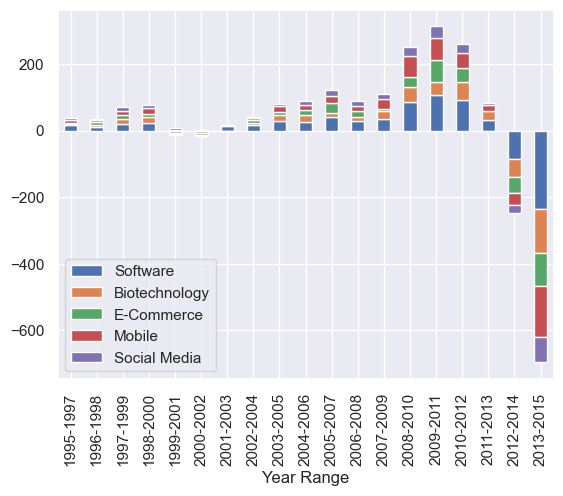

In [65]:
slopes_df.plot(kind = 'bar', x = 'Year Range',stacked = True)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



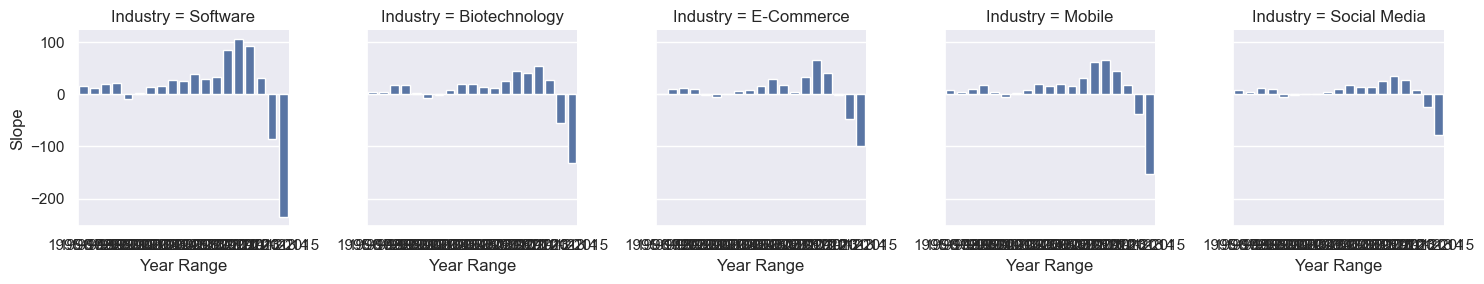

In [66]:
g = sns.FacetGrid(slope_df_stack, col="Industry",palette="Set3")
g.map(sns.barplot,'Year Range','Slope')

In [67]:
top_5_startup_df_categories_counts_summ_firstfund = top_5_startup_df_categories_counts.groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index()

top_5_categories = top_5_startup_df_categories_counts_summ_firstfund.category_list.unique()



def slopecalc2(year1,year2):
    slope = {}
    for i in top_5_categories:
        sub = top_5_startup_df_categories_counts_summ_firstfund.loc[(top_5_startup_df_categories_counts_summ_firstfund['category_list'] == i) &\
                                                          (top_5_startup_df_categories_counts_summ_firstfund['first_funding_year'] >= year1) &\
                                                          (top_5_startup_df_categories_counts_summ_firstfund['first_funding_year'] <= year2), :]
        slope[i]= stats.linregress(sub['first_funding_year'], sub['count'])[0]
    return slope






In [68]:

start_year = 1995
end_year = 2015
interval = 2
i = start_year
slope_lst = []
year_range = [] 
while i+interval <= end_year:
    slope_lst.append(slopecalc2(i,i+interval))
    year_range.append(str(i) + '-' + str(i+interval))
    i = i +1

slopes_df = pd.DataFrame(slope_lst)
slopes_df['Year Range'] = year_range

slope_df_stack = pd.melt(slopes_df,id_vars = 'Year Range', value_vars= top_5_categories)
slope_df_stack = slope_df_stack.rename(columns = {'variable': 'Industry', 'value': 'Slope'})


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning:

invalid value encountered in scalar divide

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning:

invalid value encountered in sqrt

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning:

invalid value encountered in scalar divide



<Axes: xlabel='Year Range'>

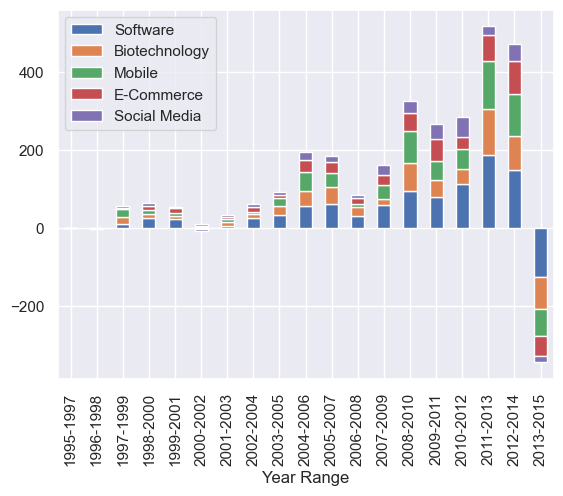

In [69]:
slopes_df.plot(kind = 'bar', x = 'Year Range',stacked = True)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



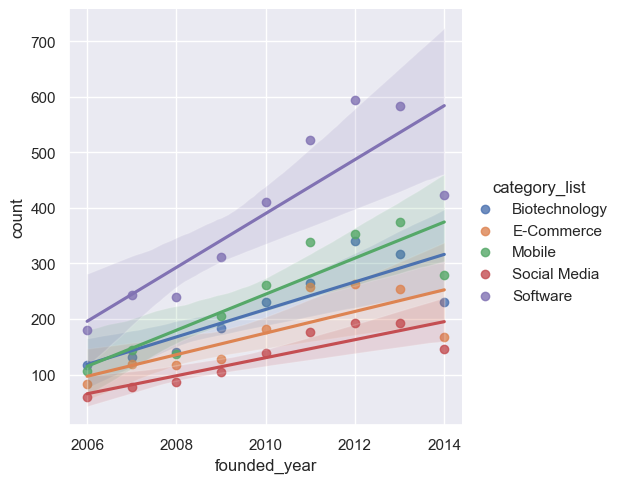

In [70]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['founded_year'] < 2015) & (top_20_startup_df_categories_counts['founded_year'] > 2005) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index().pipe((sns.lmplot, 'data'), x='founded_year', y='count', hue = 'category_list')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



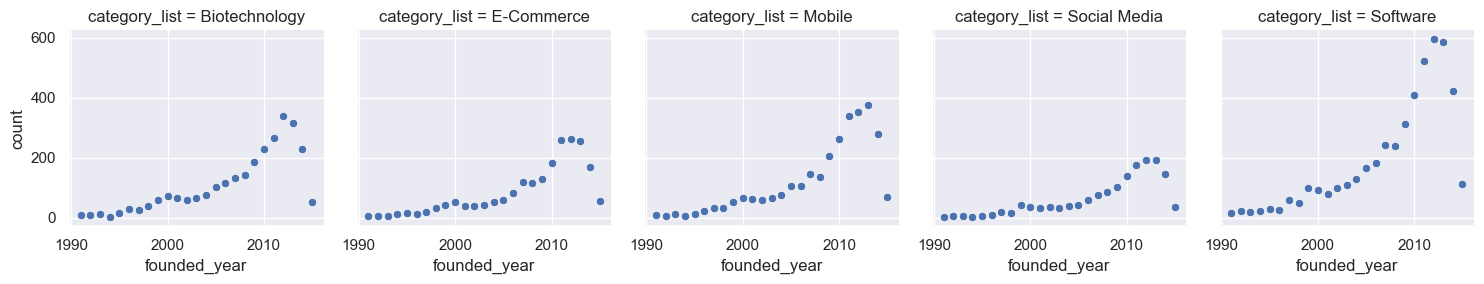

In [106]:
#same plot but facet grid by category_list
g = sns.FacetGrid(top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['founded_year'] < 2024) & (top_20_startup_df_categories_counts['founded_year'] > 1990) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index(),\
                  col = 'category_list', palette = "Set3")
g.map(sns.scatterplot,'founded_year','count')

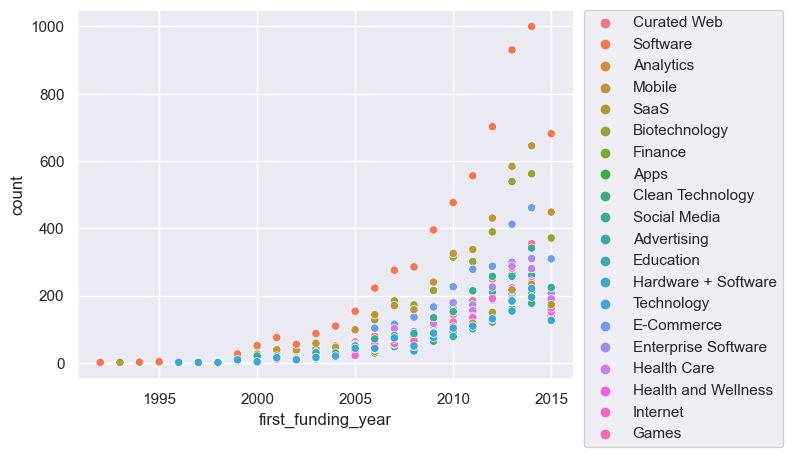

In [107]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_20_startup_df_categories_counts.loc[(top_20_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :].groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='count', hue = 'category_list')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



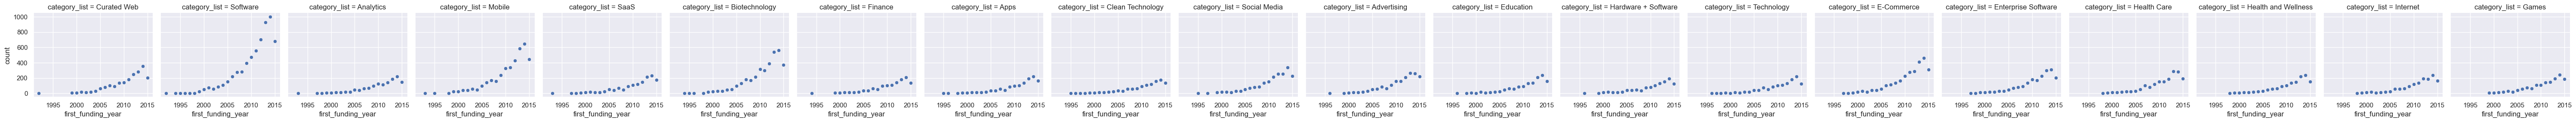

In [108]:

#same plot but facet grid by category_list
g = sns.FacetGrid(top_20_startup_df_categories_counts.loc[(top_20_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :].groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index(),\
                  col = 'category_list', palette = "Set3")
g.map(sns.scatterplot,'first_funding_year','count')

<Axes: xlabel='first_funding_year', ylabel='count'>

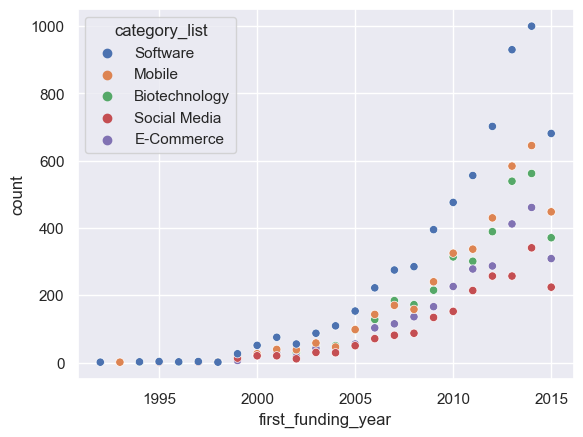

In [109]:
# companies founded between 1990 to 2015, by industry
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :].groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='count', hue = 'category_list')


In [110]:
top_5_startup_df_categories_counts

permalink                    name  \
5247   /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
5248                  /organization/0xdata                  H2O.ai   
5249             /organization/10-20-media             10-20 Media   
5250                                   NaN                     NaN   
5251                 /organization/12-labs                 12 Labs   
...                                    ...                     ...   
61310    /organization/source-technologies     SOURCE TECHNOLOGIES   
61311            /organization/sourceclear             SourceClear   
61312         /organization/southern-alpha          Southern Alpha   
61313        /organization/southern-dreams         Southern Dreams   
61314               /organization/sovicell                Sovicell   

                          homepage_url  funding_total_usd     status  \
5247               http://oneofthem.jp          3406878.0  Operating   
5248                    http://h2o.ai/         33600000.0  Operating   
5249         http://www.10-20media.com          2050000.0  Operating   
5250                               NaN                NaN        NaN   
5251       http://www.getapplause.com/           935000.0  Operating   
...                                ...                ...        ...   
61310        http://www.sourcetech.com         20000000.0  Operating   
61311              https://srcclr.com/         11500000.0  Operating   
61312        http://southernalpha.com/           175000.0  Operating   
61313  http://www.southerndreams.co.uk            38856.0  Operating   
61314          http://www.sovicell.com          1190000.0  Operating   

      country_code state_code          region            city  funding_rounds  \
5247           NaN        NaN             NaN             NaN             1.0   
5248           USA         CA     SF Bay Area   Mountain View             4.0   
5249           USA         MD       Baltimore        Woodbine             4.0   
5250           NaN        NaN             NaN             NaN             NaN   
5251           USA         CA     SF Bay Area       Palo Alto             1.0   
...            ...        ...             ...             ...             ...   
61310          USA         NC       Charlotte       Charlotte             1.0   
61311          USA         WA         Seattle         Seattle             2.0   
61312          USA         TN       Nashville       Nashville             1.0   
61313          GBR         P6  Haywards Heath  Haywards Heath             1.0   
61314          DEU         13     DEU - Other         Deutsch             2.0   

      founded_at first_funding_at last_funding_at  founded_year  \
5247         NaT       2014-01-30      2014-01-30           NaN   
5248  2011-01-01       2013-01-03      2015-11-09        2011.0   
5249  2001-01-01       2009-06-18      2011-12-28        2001.0   
5250         NaT              NaT             NaT           NaN   
5251  2014-08-01       2014-11-26      2014-11-26        2014.0   
...          ...              ...             ...           ...   
61310 1986-01-01       2009-06-12      2009-06-12        1986.0   
61311 2013-01-01       2014-06-11      2015-10-27        2013.0   
61312 2012-01-01       2012-06-01      2012-06-01        2012.0   
61313        NaT       2012-05-31      2012-05-31           NaN   
61314        NaT       2007-03-01      2009-05-14           NaN   

       first_funding_year  last_funding_year  founded_month  \
5247               2014.0             2014.0            NaN   
5248               2013.0             2015.0            1.0   
5249               2009.0             2011.0            1.0   
5250                  NaN                NaN            NaN   
5251               2014.0             2014.0            8.0   
...                   ...                ...            ...   
61310              2009.0             2009.0            1.0   
61311              2014.0             2015.0 

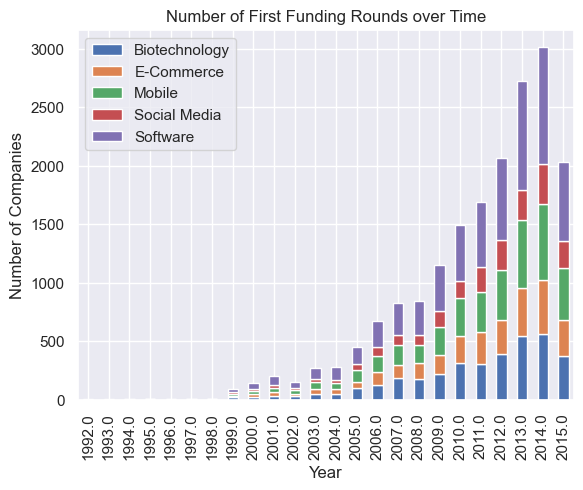

In [111]:
top_5_startup_df_categories_counts_pivot = top_5_startup_df_categories_counts.groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index()\
.pivot(index = 'first_funding_year',columns = 'category_list',values = 'count').reset_index()
top_5_startup_df_categories_counts_pivot.loc[top_5_startup_df_categories_counts_pivot['first_funding_year'] > 1991 , :]\
.plot(kind = 'bar', x = 'first_funding_year', stacked = True)


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of First Funding Rounds over Time") 
plt.legend()

In [112]:
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :]\
.groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index()#.plot(kind = 'bar', x = 'first_funding_year', y = 'count', stacked = True)

first_funding_year  category_list  count
0                1992.0       Software      1
1                1993.0         Mobile      1
2                1994.0  Biotechnology      1
3                1994.0       Software      2
4                1995.0  Biotechnology      1
..                  ...            ...    ...
97               2015.0  Biotechnology    371
98               2015.0     E-Commerce    309
99               2015.0         Mobile    448
100              2015.0   Social Media    224
101              2015.0       Software    681

[102 rows x 3 columns]

In [113]:
top_5_startup_df_categories_counts

permalink                    name  \
5247   /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
5248                  /organization/0xdata                  H2O.ai   
5249             /organization/10-20-media             10-20 Media   
5250                                   NaN                     NaN   
5251                 /organization/12-labs                 12 Labs   
...                                    ...                     ...   
61310    /organization/source-technologies     SOURCE TECHNOLOGIES   
61311            /organization/sourceclear             SourceClear   
61312         /organization/southern-alpha          Southern Alpha   
61313        /organization/southern-dreams         Southern Dreams   
61314               /organization/sovicell                Sovicell   

                          homepage_url  funding_total_usd     status  \
5247               http://oneofthem.jp          3406878.0  Operating   
5248                    http://h2o.ai/         33600000.0  Operating   
5249         http://www.10-20media.com          2050000.0  Operating   
5250                               NaN                NaN        NaN   
5251       http://www.getapplause.com/           935000.0  Operating   
...                                ...                ...        ...   
61310        http://www.sourcetech.com         20000000.0  Operating   
61311              https://srcclr.com/         11500000.0  Operating   
61312        http://southernalpha.com/           175000.0  Operating   
61313  http://www.southerndreams.co.uk            38856.0  Operating   
61314          http://www.sovicell.com          1190000.0  Operating   

      country_code state_code          region            city  funding_rounds  \
5247           NaN        NaN             NaN             NaN             1.0   
5248           USA         CA     SF Bay Area   Mountain View             4.0   
5249           USA         MD       Baltimore        Woodbine             4.0   
5250           NaN        NaN             NaN             NaN             NaN   
5251           USA         CA     SF Bay Area       Palo Alto             1.0   
...            ...        ...             ...             ...             ...   
61310          USA         NC       Charlotte       Charlotte             1.0   
61311          USA         WA         Seattle         Seattle             2.0   
61312          USA         TN       Nashville       Nashville             1.0   
61313          GBR         P6  Haywards Heath  Haywards Heath             1.0   
61314          DEU         13     DEU - Other         Deutsch             2.0   

      founded_at first_funding_at last_funding_at  founded_year  \
5247         NaT       2014-01-30      2014-01-30           NaN   
5248  2011-01-01       2013-01-03      2015-11-09        2011.0   
5249  2001-01-01       2009-06-18      2011-12-28        2001.0   
5250         NaT              NaT             NaT           NaN   
5251  2014-08-01       2014-11-26      2014-11-26        2014.0   
...          ...              ...             ...           ...   
61310 1986-01-01       2009-06-12      2009-06-12        1986.0   
61311 2013-01-01       2014-06-11      2015-10-27        2013.0   
61312 2012-01-01       2012-06-01      2012-06-01        2012.0   
61313        NaT       2012-05-31      2012-05-31           NaN   
61314        NaT       2007-03-01      2009-05-14           NaN   

       first_funding_year  last_funding_year  founded_month  \
5247               2014.0             2014.0            NaN   
5248               2013.0             2015.0            1.0   
5249               2009.0             2011.0            1.0   
5250                  NaN                NaN            NaN   
5251               2014.0             2014.0            8.0   
...                   ...                ...            ...   
61310              2009.0             2009.0            1.0   
61311              2014.0             2015.0 

In [114]:
#top_5_startup_df_categories_counts.plot(kind = 'bar', x = 'Year Range',stacked = True)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



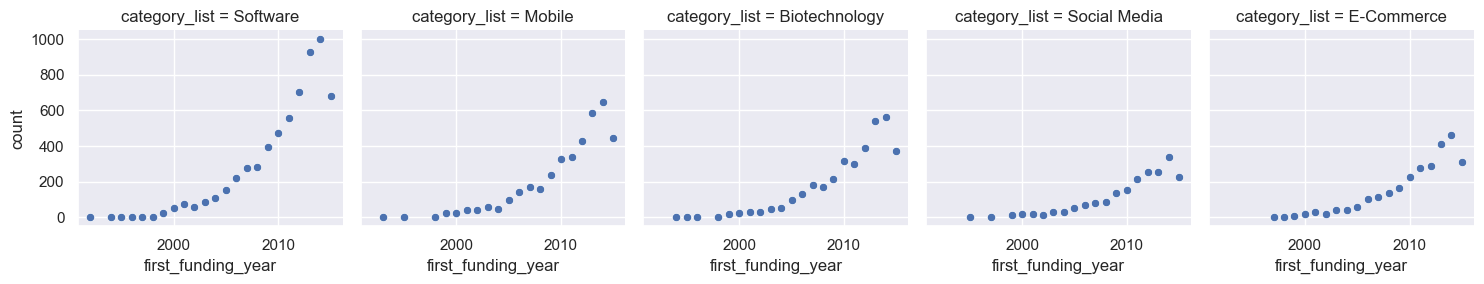

In [115]:
#same plot but facet grid by category_list
g = sns.FacetGrid(top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :].groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index(),\
                  col = 'category_list', palette = "Set3")
g.map(sns.scatterplot,'first_funding_year','count')

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



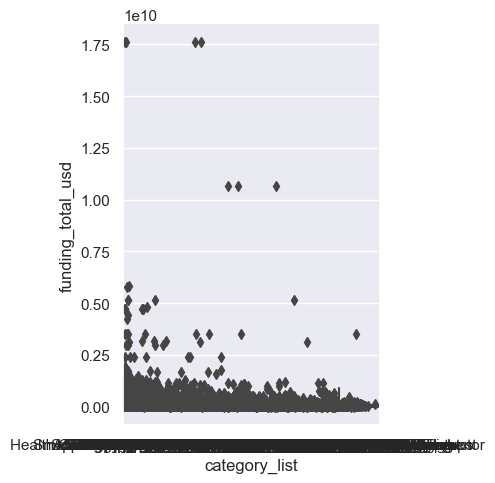

In [116]:
sns.set_theme(style="darkgrid")
startup_df_categories.head()
sns.catplot(data=startup_df_categories, x='category_list', y='funding_total_usd', kind='box')

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



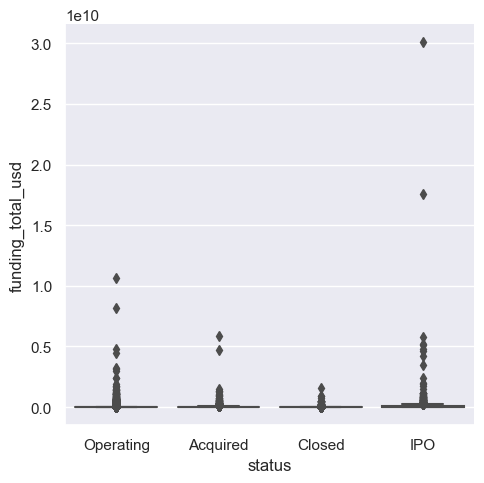

In [117]:
sns.set_theme(style="darkgrid")

sns.catplot(data=startup_df, x='status', y='funding_total_usd', kind='box')

In [118]:
startup_df.groupby('status')['funding_total_usd'].agg(['count','sum','mean','median','std'])

count           sum          mean      median           std
status                                                                
Acquired    4790  1.355237e+11  2.829304e+07  10000000.0  1.280034e+08
Closed      4912  5.353071e+10  1.089794e+07   1250000.0  4.380889e+07
IPO         1441  2.099612e+11  1.457052e+08  30675796.0  9.882934e+08
Operating  42440  5.911235e+11  1.392845e+07   1520832.0  9.396951e+07

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



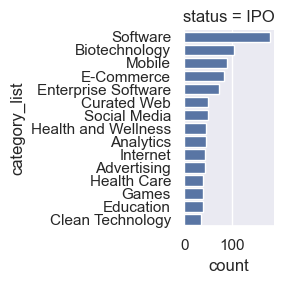

In [119]:
# count of each category for companies that have IPO'd
startup_df_categories_ipo_acq = startup_df_categories.loc[(startup_df_categories['status'] == 'IPO') ,:].groupby(['status','category_list'])[['permalink']].count().reset_index().rename(columns = {'permalink': 'count'}).sort_values(by = 'count', ascending=False)
startup_df_categories_ipo_acq
g = sns.FacetGrid(startup_df_categories_ipo_acq.head(15), col="status",palette="Set3")
g.map(sns.barplot,'count','category_list')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



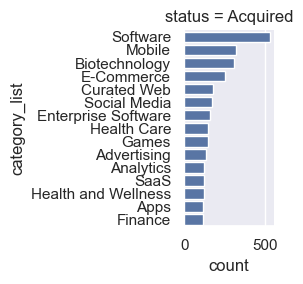

In [120]:
# count of each category for companies that have been acquire
startup_df_categories_ipo_acq = startup_df_categories.loc[(startup_df_categories['status'] == 'Acquired') ,:].groupby(['status','category_list'])[['permalink']].count().reset_index().rename(columns = {'permalink': 'count'}).sort_values(by = 'count', ascending=False)
startup_df_categories_ipo_acq
g = sns.FacetGrid(startup_df_categories_ipo_acq.head(15), col="status",palette="Set3")
g.map(sns.barplot,'count','category_list')

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



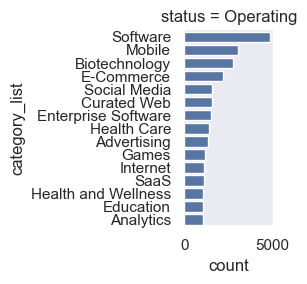

In [121]:
# count of each category for companies that are operating
startup_df_categories_ipo_acq = startup_df_categories.loc[(startup_df_categories['status'] == 'Operating') ,:].groupby(['status','category_list'])[['permalink']].count().reset_index().rename(columns = {'permalink': 'count'}).sort_values(by = 'count', ascending=False)
startup_df_categories_ipo_acq
g = sns.FacetGrid(startup_df_categories_ipo_acq.head(15), col="status",palette="Set3")
g.map(sns.barplot,'count','category_list')

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



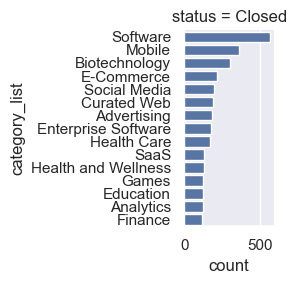

In [122]:
# count of each category for companies that are closed
startup_df_categories_ipo_acq = startup_df_categories.loc[(startup_df_categories['status'] == 'Closed') ,:].groupby(['status','category_list'])[['permalink']].count().reset_index().rename(columns = {'permalink': 'count'}).sort_values(by = 'count', ascending=False)
startup_df_categories_ipo_acq
g = sns.FacetGrid(startup_df_categories_ipo_acq.head(15), col="status",palette="Set3")
g.map(sns.barplot,'count','category_list')

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



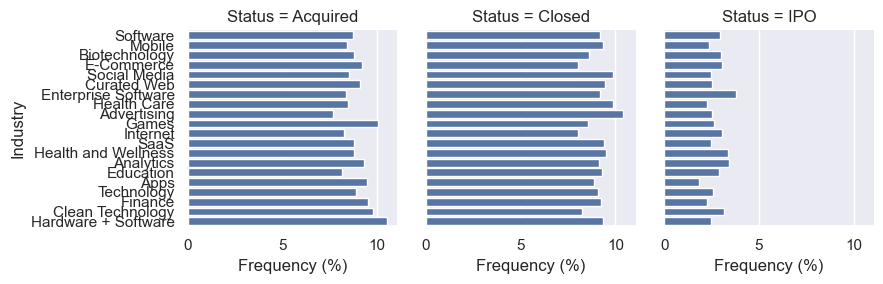

In [123]:
sns.set_theme(style="darkgrid")

startup_df_categories_pivot = startup_df_categories.loc[:,['permalink','status','category_list']]\
    .groupby(['category_list', 'status']).count().reset_index()\
    .pivot_table(fill_value = 0, index = 'category_list',columns = 'status', values = 'permalink')\
    


startup_df_categories_pivot['total'] = startup_df_categories_pivot['Acquired'] + startup_df_categories_pivot['Closed'] + startup_df_categories_pivot['IPO'] + startup_df_categories_pivot['Operating']

startup_df_categories_pivot['Acquired_frequency'] = (startup_df_categories_pivot['Acquired'] / startup_df_categories_pivot['total']) * 100
startup_df_categories_pivot['Closed_frequency'] = (startup_df_categories_pivot['Closed'] / startup_df_categories_pivot['total']) * 100
startup_df_categories_pivot['IPO_frequency'] = (startup_df_categories_pivot['IPO'] / startup_df_categories_pivot['total']) * 100
startup_df_categories_pivot['Operating_frequency'] = (startup_df_categories_pivot['Operating'] / startup_df_categories_pivot['total']) * 100

top_20_startup_categories = startup_df_categories_pivot.sort_values(by = 'total', ascending = False).head(20).reset_index()

top_20_startup_categories_stacked = top_20_startup_categories.melt(id_vars = 'category_list', value_vars = ['Acquired_frequency','Closed_frequency','IPO_frequency','Operating_frequency'])

top_20_startup_categories_stacked_subset = top_20_startup_categories_stacked.loc[top_20_startup_categories_stacked['status'] != 'Operating_frequency',:].rename(columns = {'category_list': 'Industry', 'status': 'Status', 'value': 'Frequency (%)'})
top_20_startup_categories_stacked_subset['Status']= top_20_startup_categories_stacked_subset['Status'].str.replace('_frequency','')


g = sns.FacetGrid(top_20_startup_categories_stacked_subset, col="Status",palette="Set3")
g.map(sns.barplot,'Frequency (%)','Industry')

# plt.xlabel("Year")
# plt.ylabel("Number of Startup Industries")
# plt.title("Number of Startup Industries over Time") 


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



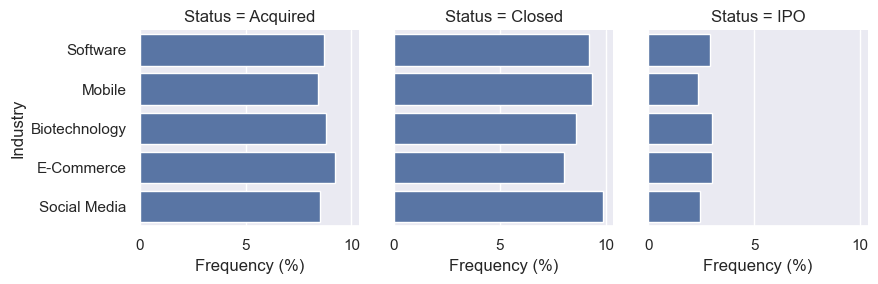

In [124]:

top_5_startup_categories = startup_df_categories_pivot.sort_values(by = 'total', ascending = False).head(5).reset_index()

top_5_startup_categories_stacked = top_5_startup_categories.melt(id_vars = 'category_list', value_vars = ['Acquired_frequency','Closed_frequency','IPO_frequency','Operating_frequency'])

top_5_startup_categories_stacked_subset = top_5_startup_categories_stacked.loc[top_5_startup_categories_stacked['status'] != 'Operating_frequency',:].rename(columns = {'category_list': 'Industry', 'status': 'Status', 'value': 'Frequency (%)'})
top_5_startup_categories_stacked_subset['Status']= top_5_startup_categories_stacked_subset['Status'].str.replace('_frequency','')


g = sns.FacetGrid(top_5_startup_categories_stacked_subset, col="Status",palette="Set3")
g.map(sns.barplot,'Frequency (%)','Industry')


In [125]:
startup_df_categories_industry_count = startup_df_categories.copy()

startup_df_categories_industry_count = startup_df_categories_industry_count.sort_values(by = 'founded_year').reset_index()

current_count = 0
previous_values = []
counts = []

# Loop through the column and count unique values
for val in startup_df_categories_industry_count['category_list']:
    if val not in previous_values:
        current_count += 1
        previous_values.append(val)
    counts.append(current_count)

# Add the counts to the DataFrame
startup_df_categories_industry_count['category_counts'] = counts



In [126]:
startup_df_categories_industry_count.head(50)

level_0                                      permalink  \
0     52517                              /organization/g4s   
1    127851                       /organization/sodastream   
2     78817            /organization/loma-linda-university   
3     76621         /organization/liberator-medical-supply   
4     71609           /organization/justrite-manufacturing   
5     71608           /organization/justrite-manufacturing   
6     71607           /organization/justrite-manufacturing   
7     71606           /organization/justrite-manufacturing   
8     76620         /organization/liberator-medical-supply   
9     76619         /organization/liberator-medical-supply   
10    24475             /organization/ces-acquisition-corp   
11    99734                  /organization/owensboro-grain   
12    61312                     /organization/home-bancorp   
13    72666               /organization/kerasotes-theatres   
14   124880                    /organization/since1910-com   
15    25239       /organization/chicago-miniature-lighting   
16   124882                    /organization/since1910-com   
17   124879                    /organization/since1910-com   
18   124881                    /organization/since1910-com   
19   124878                    /organization/since1910-com   
20   124877                    /organization/since1910-com   
21    40154                            /organization/eaton   
22   122784                /organization/sharp-corporation   
23     9584      /organization/arkansas-childrens-hospital   
24   122783                /organization/sharp-corporation   
25    94637   /organization/northcentral-technical-college   
26     9583      /organization/arkansas-childrens-hospital   
27     9582      /organization/arkansas-childrens-hospital   
28   116336                /organization/rice-university-2   
29    80301   /organization/madison-area-technical-college   
30   122782                /organization/sharp-corporation   
31   116338                /organization/rice-university-2   
32    94635   /organization/northcentral-technical-college   
33    80303   /organization/madison-area-technical-college   
34   116339                /organization/rice-university-2   
35    80302   /organization/madison-area-technical-college   
36    80300   /organization/madison-area-technical-college   
37   116337                /organization/rice-university-2   
38    94636   /organization/northcentral-technical-college   
39    53946       /organization/georgia-state-university-2   
40    25274  /organization/childrens-medical-center-dallas   
41    96369                       /organization/office-max   
42    96368                       /organization/office-max   
43    96370                       /organization/office-max   
44    96367                       /organization/office-max   
45    82467            /organization/mcgraw-hill-education   
46    82466            /organization/mcgraw-hill-education   
47    82468            /organization/mcgraw-hill-education   
48    82469            /organization/mcgraw-hill-education   
49    13241                     /organization/barnes-noble   

                                name                      homepage_url  \
0                                G4S                    http://g4s.com   
1                         SodaStream         http://www.sodastream.com   
2              Loma Linda University               http://www.llu.edu/   
3           Liberator Medical Supply       http://liberatormedical.com   
4             Justrite Manufacturing        http://www.justritemfg.com   
5             Justrite Manufacturing        http://www.justritemfg.com   
6             Justrite Manufacturing        http://www.justritemfg.com   
7             Justrite Manufacturing        http://www.justritemfg.com   
8           Liberator Medical Supply       http://liberatormedical.com   
9           Liberator Medical Supply       http://liberatormedical.com   
10              CES Acquisi

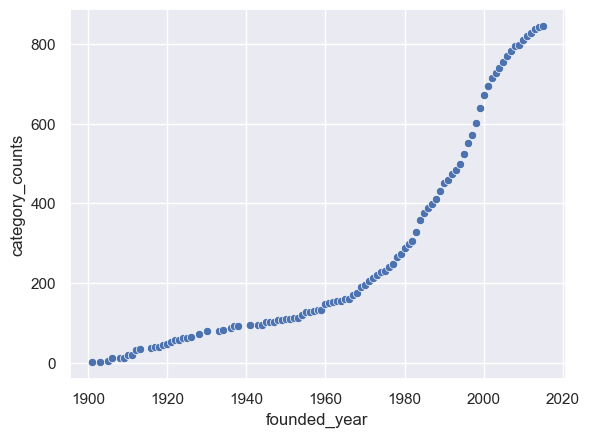

In [127]:
startup_df_categories_industry_count.loc[(startup_df_categories_industry_count['founded_year'] < 2024) & (startup_df_categories_industry_count['founded_year'] > 1900) , :].groupby(['founded_year'])[['category_counts']].max().reset_index()\
.pipe((sns.scatterplot, 'data'), x='founded_year', y='category_counts')
sns.set_theme(style="darkgrid")


In [128]:
startup_df_categories_industry_country_count = startup_df_categories.copy()
startup_df_categories_industry_country_count['country_category_concat'] = startup_df_categories_industry_country_count['country_name'] + '-' + startup_df_categories_industry_country_count['category_list'] 
startup_df_categories_industry_country_count = startup_df_categories_industry_country_count.sort_values(by = 'founded_year').reset_index()

countries_of_interest = ['United States','United Kingdom','Canada','India','China']
df_list = []

for country in countries_of_interest:
    temp_df = startup_df_categories_industry_country_count.loc[startup_df_categories_industry_country_count['country_name'] == country, :]
    current_count = 0
    previous_values = []
    counts = []
    for val in temp_df['category_list']:
        if val not in previous_values:
            current_count += 1
            previous_values.append(val)
        counts.append(current_count)
    temp_df['category_country_counts'] = counts
    df_list.append(temp_df)
    
startup_df_categories_industry_country_count = pd.concat(df_list)
startup_df_categories_industry_country_count

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_23664/3451441514.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_23664/3451441514.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_23664/3451441514.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

level_0                                permalink  \
2         78817      /organization/loma-linda-university   
3         76621   /organization/liberator-medical-supply   
4         71609     /organization/justrite-manufacturing   
5         71608     /organization/justrite-manufacturing   
6         71607     /organization/justrite-manufacturing   
...         ...                                      ...   
129230   129173  /organization/souzhou-ribo-life-science   
129273   129256      /organization/space-star-technology   
129274   129257      /organization/space-star-technology   
129275   129258      /organization/space-star-technology   
129276   129259      /organization/space-star-technology   

                             name                    homepage_url  \
2           Loma Linda University             http://www.llu.edu/   
3        Liberator Medical Supply     http://liberatormedical.com   
4          Justrite Manufacturing      http://www.justritemfg.com   
5          Justrite Manufacturing      http://www.justritemfg.com   
6          Justrite Manufacturing      http://www.justritemfg.com   
...                           ...                             ...   
129230  Souzhou Ribo Life Science          http://www.ribolia.com   
129273      Space Star Technology  http://www.spacestar.com.cn/en   
129274      Space Star Technology  http://www.spacestar.com.cn/en   
129275      Space Star Technology  http://www.spacestar.com.cn/en   
129276      Space Star Technology  http://www.spacestar.com.cn/en   

        funding_total_usd     status country_code state_code  \
2                600000.0  Operating          USA         CA   
3               7000000.0   Acquired          USA         FL   
4              14800000.0   Acquired          USA         IL   
5              14800000.0   Acquired          USA         IL   
6              14800000.0   Acquired          USA         IL   
...                   ...        ...          ...        ...   
129230          7400000.0  Operating          CHN          1   
129273          4250000.0  Operating          CHN         22   
129274          4250000.0  Operating          CHN         22   
129275          4250000.0  Operating          CHN         22   
129276          4250000.0  Operating          CHN         22   

                          region        city  funding_rounds founded_at  \
2        Ontario - Inland Empire  Loma Linda             1.0 1905-01-01   
3       Florida's Treasure Coast      Stuart             1.0 1906-01-01   
4          Springfield, Illinois     Mattoon             1.0 1906-01-01   
5          Springfield, Illinois     Mattoon             1.0 1906-01-01   
6          Springfield, Illinois     Mattoon             1.0 1906-01-01   
...                          ...         ...             ...        ...   
129230                   Kunshan     Kunshan             1.0        NaT   
129273                   Beijing     Beijing             1.0        NaT   
129274                   Beijing     Beijing             1.0        NaT   
129275                   Beijing     Beijing             1.0        NaT   
129276                   Beijing     Beijing             1.0        NaT   

       first_funding_at last_funding_at  founded_year  first_funding_year  \
2            2014-11-25      2014-11-25        1905.0              2014.0   
3            2010-03-11      2010-03-11        1906.0              2010.0   
4            2014-02-20      2014-02-20        1906.0              2014.0   
5            2014-02-20      2014-02-20        1906.0              2014.0   
6            2014-02-20      2014-02-20        1906.0              2014.0   
...                 ...             ...           ...                 ...   
129230       2014-01-07      2014-01-07           NaN              2014.0   
129273       2009-10-26      2009-10-26           NaN              2009.0   
129274       2009-10-26      2009-10-26           NaN              2009.0   
129275       2009-

Text(0.5, 1.0, 'Number of Startup Industries over Time')

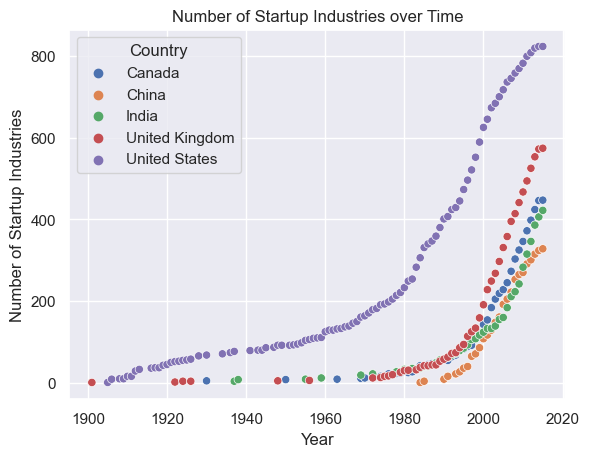

In [129]:
startup_df_categories_industry_country_count.loc[(startup_df_categories_industry_country_count['founded_year'] < 2024) & (startup_df_categories_industry_country_count['founded_year'] > 1900) , :].groupby(['country_name','founded_year'])[['category_country_counts']].max().reset_index()\
.rename(columns = {'country_name': 'Country'})\
.pipe((sns.scatterplot, 'data'), x='founded_year', y='category_country_counts', hue = 'Country')
sns.set_theme(style="darkgrid")

plt.xlabel("Year")
plt.ylabel("Number of Startup Industries")
plt.title("Number of Startup Industries over Time") 



In [130]:
startup_df_categories_industry_city_count = startup_df_categories.copy()
startup_df_categories_industry_city_count = startup_df_categories_industry_city_count.sort_values(by = 'founded_year').reset_index()

cities_of_interest = ['San Francisco','New York','Seattle','Austin','Palo Alto','Los Angeles','Chicago']
df_list = []

for city in cities_of_interest:
    temp_df = startup_df_categories_industry_city_count.loc[startup_df_categories_industry_city_count['city'] == city, :]
    current_count = 0
    previous_values = []
    counts = []
    for val in temp_df['category_list']:
        if val not in previous_values:
            current_count += 1
            previous_values.append(val)
        counts.append(current_count)
    temp_df['category_city_counts'] = counts
    df_list.append(temp_df)
    
startup_df_categories_industry_city_count = pd.concat(df_list)
startup_df_categories_industry_city_count

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_23664/4188051550.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_23664/4188051550.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_23664/4188051550.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

level_0                                          permalink  \
507       24845                       /organization/charles-schwab   
834       17716  /organization/blue-shield-of-california-founda...   
1386      20531                      /organization/business-engine   
1387      20530                      /organization/business-engine   
1399      20528                      /organization/business-engine   
...         ...                                                ...   
125591   119027                        /organization/sandbox-group   
125592   119028                        /organization/sandbox-group   
125593   119029                        /organization/sandbox-group   
125822   119750                          /organization/scholastica   
126748   122266                             /organization/setuserv   

                                        name  \
507                           Charles Schwab   
834     Blue Shield of California Foundation   
1386                         Business Engine   
1387                         Business Engine   
1399                         Business Engine   
...                                      ...   
125591                         Sandbox Group   
125592                         Sandbox Group   
125593                         Sandbox Group   
125822                           Scholastica   
126748                              SetuServ   

                                          homepage_url  funding_total_usd  \
507                                  http://schwab.com          6178766.0   
834                  http://blueshieldcafoundation.org          9100000.0   
1386                                               NaN          4000000.0   
1387                                               NaN          4000000.0   
1399                                               NaN          4000000.0   
...                                                ...                ...   
125591                           http://sandboxww.com/         27000000.0   
125592                           http://sandboxww.com/         27000000.0   
125593                           http://sandboxww.com/         27000000.0   
125822                   http://www.scholasticahq.com/           510000.0   
126748  http://setuserv.com; http//mineforinsights.com           160000.0   

           status country_code state_code       region           city  \
507      Acquired          USA         CA  SF Bay Area  San Francisco   
834     Operating          USA         CA  SF Bay Area  San Francisco   
1386     Acquired          USA         CA  SF Bay Area  San Francisco   
1387     Acquired          USA         CA  SF Bay Area  San Francisco   
1399     Acquired          USA         CA  SF Bay Area  San Francisco   
...           ...          ...        ...          ...            ...   
125591  Operating          USA         IL      Chicago        Chicago   
125592  Operating          USA         IL      Chicago        Chicago   
125593  Operating          USA         IL      Chicago        Chicago   
125822  Operating          USA         IL      Chicago        Chicago   
126748  Operating          USA         IL      Chicago        Chicago   

        funding_rounds founded_at first_funding_at last_funding_at  \
507                1.0 1973-04-01       2010-01-04      2010-01-04   
834                1.0 1981-01-01       2013-06-27      2013-06-27   
1386               1.0 1985-01-01       2005-09-02      2005-09-02   
1387               1.0 1985-01-01       2005-09-02      2005-09-02   
1399               1.0 1985-01-01       2005-09-02      2005-09-02   
...                ...        ...              ...             ...   
125591             1.0        NaT       2015-02-26      2015-02-26   
125592             1.0        NaT       2015-02-26      2015-02-26   
125593             1.0        NaT       2015-02-26      2015-02-26   
125822             1.0        NaT       2014-05-07      2014-05-07   
126748            

Text(0.5, 1.0, 'Number of Startup Industries over Time')

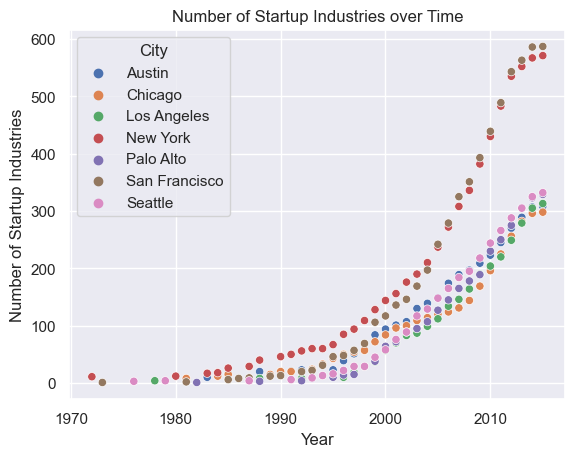

In [131]:
startup_df_categories_industry_city_count.loc[(startup_df_categories_industry_city_count['founded_year'] < 2024) & (startup_df_categories_industry_city_count['founded_year'] > 1970) , :].groupby(['city','founded_year'])[['category_city_counts']].max().reset_index()\
.rename(columns = {'city': 'City'})\
.pipe((sns.scatterplot, 'data'), x='founded_year', y='category_city_counts', hue = 'City')
sns.set_theme(style="darkgrid")

plt.xlabel("Year")
plt.ylabel("Number of Startup Industries")
plt.title("Number of Startup Industries over Time") 



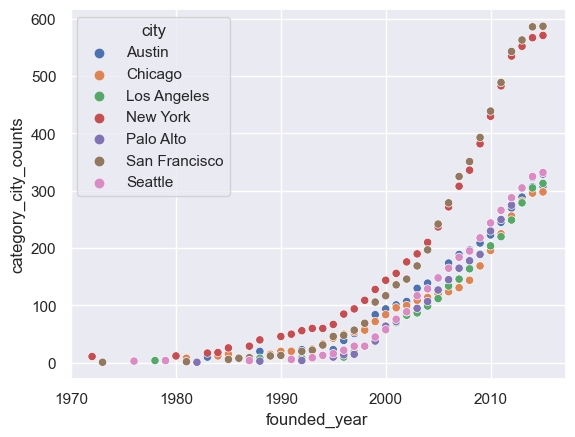

In [132]:
startup_df_categories_industry_city_count.loc[(startup_df_categories_industry_city_count['founded_year'] < 2024) & (startup_df_categories_industry_city_count['founded_year'] > 1970) , :].groupby(['city','founded_year'])[['category_city_counts']].max().reset_index()\
.pipe((sns.scatterplot, 'data'), x='founded_year', y='category_city_counts', hue = 'city')
sns.set_theme(style="darkgrid")


<Axes: xlabel='value', ylabel='index'>

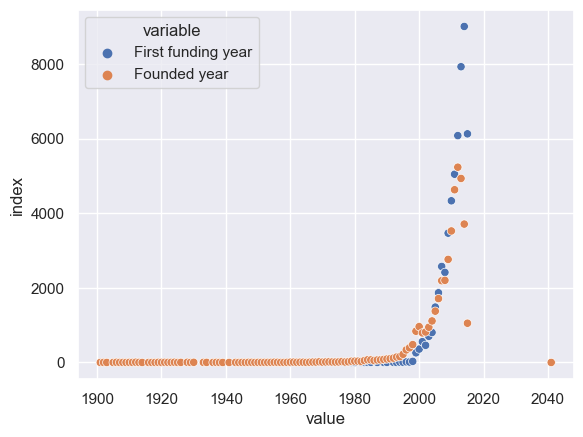

In [133]:
startup_df.loc[:,['founded_year','first_funding_year']]

startup_df_first_founded_stack = pd.melt(startup_df.loc[:,['founded_year','first_funding_year']], value_vars=['founded_year', 'first_funding_year']).dropna().sort_values(by = 'value').reset_index().groupby(['variable','value'])[['index']].count().reset_index()
startup_df_first_founded_stack['variable'] = startup_df_first_founded_stack['variable'].str.replace('_'," ").str.capitalize()
startup_df_first_founded_stack.pipe((sns.scatterplot, 'data'), x='value', y='index', hue = 'variable')


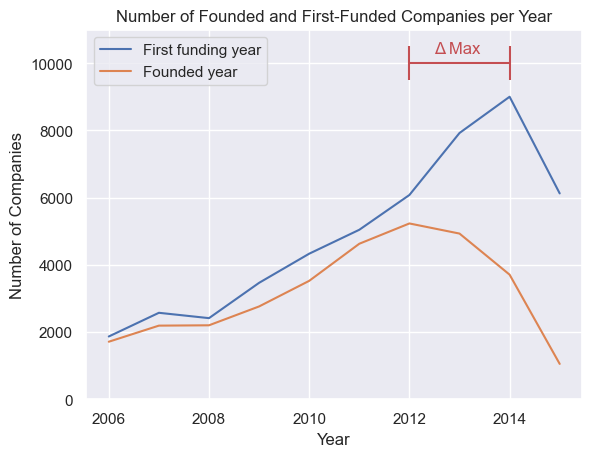

In [159]:
fig = startup_df_first_founded_stack.loc[(startup_df_first_founded_stack['value'] < 2024) & (startup_df_first_founded_stack['value'] > 2005), :]\
.pipe((sns.lineplot, 'data'), x='value', y='index', hue = 'variable')
fig.vlines(x = 2012, ymin = 9500, ymax = 10500, color = 'r', linestyle='solid')
fig.vlines(x = 2014, ymin = 9500, ymax = 10500, color = 'r', linestyle='solid')
fig.hlines(y=10000, xmin=2012, xmax=2014, color='r', linestyle='solid')


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.ylim(0,11000)
plt.text(2012.5,10300,'Δ Max', color = 'r')
plt.title("Number of Founded and First-Funded Companies per Year") 
plt.legend(loc='upper left')



Text(0.5, 1.0, 'Average First Funding Amount over Time')

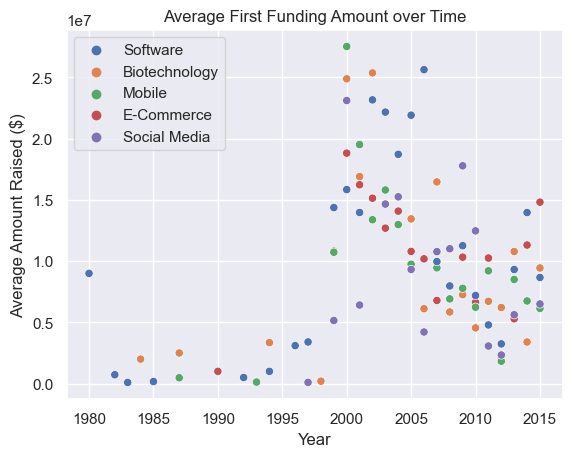

In [135]:
#same plot but without outliers: average first rounds of funding over years

sns.set_theme(style="darkgrid")

top_5_startup_df_agg = startup_df_categories.loc[(startup_df_categories['funding_rounds'] == 1) & (startup_df_categories['category_list'].isin(['Software','Biotechnology','Mobile','E-Commerce','Social Media'])), :].groupby(['first_funding_year','category_list'])['funding_total_usd'].agg(['mean','max','sum'])

top_5_startup_df_agg.loc[top_5_startup_df_agg['mean'] < 30000000,:].pipe((sns.scatterplot, 'data'), x='first_funding_year', y='mean', hue = 'category_list')
plt.legend(loc='upper left')


plt.xlabel("Year")
plt.ylabel("Average Amount Raised ($)")
plt.title("Average First Funding Amount over Time") 




<Axes: xlabel='first_funding_year'>

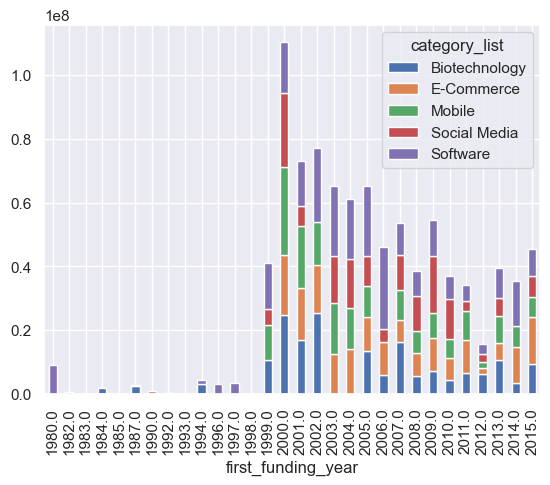

In [136]:
top_5_startup_df_agg_pivot = top_5_startup_df_agg.loc[top_5_startup_df_agg['mean'] < 30000000,:].reset_index()\
.pivot(index = 'first_funding_year',columns = 'category_list',values = 'mean').reset_index()
top_5_startup_df_agg_pivot.plot(kind = 'bar', x = 'first_funding_year', stacked = True)

# top_5_startup_df_categories_counts_pivot = top_5_startup_df_categories_counts.groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index()\
# .pivot(index = 'first_funding_year',columns = 'category_list',values = 'count').reset_index()
# top_5_startup_df_categories_counts_pivot.loc[top_5_startup_df_categories_counts_pivot['first_funding_year'] > 1998 , :]\
# .plot(kind = 'bar', x = 'first_funding_year', stacked = True)

Text(0.5, 1.0, 'Total First Funding Amount over Time')

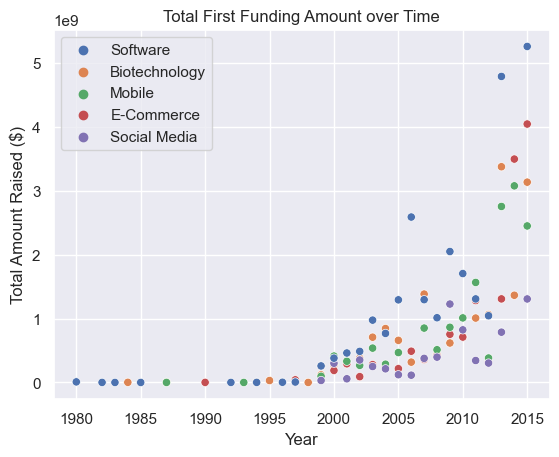

In [137]:
top_5_startup_df_agg.loc[top_5_startup_df_agg['sum'] < 8000000000,:].pipe((sns.scatterplot, 'data'), x='first_funding_year', y='sum', hue = 'category_list')
plt.legend(loc='upper left')


plt.xlabel("Year")
plt.ylabel("Total Amount Raised ($)")
plt.title("Total First Funding Amount over Time") 


<Axes: ylabel='country_name'>

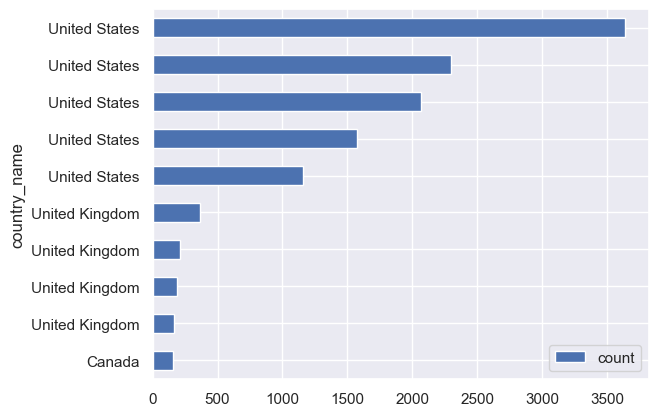

In [138]:

country_total_funding_categories= startup_df_categories.loc[startup_df_categories['country_name'] != 'Lookup error occurred',:]
country_total_funding_categories = country_total_funding_categories.groupby(['country_name','category_list'])['funding_total_usd'].agg(['count']).reset_index().set_index('country_name')

country_total_funding_categories
country_total_funding_categories.loc[country_total_funding_categories['category_list'].isin(['Software','Biotechnology','Mobile','E-Commerce','Social Media']),:].sort_values(by = 'count').tail(10).plot.barh()

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



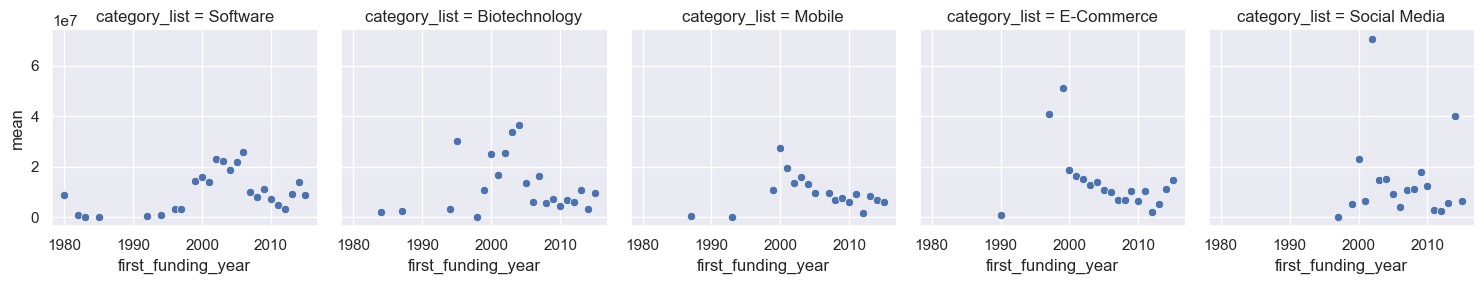

In [139]:
#same plot but with facetgrid
sns.set_theme(style="darkgrid")


g = sns.FacetGrid(top_5_startup_df_agg.loc[top_5_startup_df_agg['mean'] < 350000000,:].reset_index(),\
                  col = 'category_list', palette = "Set3")
g.map(sns.scatterplot,'first_funding_year','mean')

In [140]:
startup_df_first_founded_stack\
.pivot(index = 'value',columns = 'variable',values = 'index').dropna().sort_values(by = 'value').reset_index()\
.pipe((sns.scatterplot, 'data'), x='founded_year', y='first_funding_year',hue = 'value')

ValueError: Could not interpret value `founded_year` for parameter `x`

In [141]:
startup_df.groupby(['founded_year','first_funding_year']).count()

permalink  \
0                                    /organization/-fame   
1                                 /organization/-qounter   
2                    /organization/-the-one-of-them-inc-   
3                                  /organization/0-6-com   
5                       /organization/01games-technology   
...                                                  ...   
66362                                /organization/zzish   
66363  /organization/zznode-science-and-technology-co...   
66364                          /organization/zzzzapp-com   
66366                              /organization/Ôasys-2   
66367  /organization/İnovatiff-reklam-ve-tanıtım-hizm...   

                                             name            homepage_url  \
0                                           #fame      http://livfame.com   
1                                        :Qounter  http://www.qounter.com   
2                          (THE) ONE of THEM,Inc.     http://oneofthem.jp   
3                                         0-6.com      http://www.0-6.com   
5                              01Games Technology  http://www.01games.hk/   
...                                           ...                     ...   
66362                                       Zzish    http://www.zzish.com   
66363               ZZNode Science and Technology   http://www.zznode.com   
66364                       Zzzzapp Wireless ltd.  http://www.zzzzapp.com   
66366                                       Ôasys    http://www.oasys.io/   
66367  İnovatiff Reklam ve Tanıtım Hizmetleri Tic    http://inovatiff.com   

                                           category_list  funding_total_usd  \
0                                                  Media         10000000.0   
1      Application Platforms|Real Time|Social Network...           700000.0   
2                                      Apps|Games|Mobile          3406878.0   
3                                            Curated Web          2000000.0   
5                                                  Games            41250.0   
...                                                  ...                ...   
66362  Analytics|Android|Developer APIs|Education|Gam...          1120000.0   
66363                                Enterprise Software          1587301.0   
66364        Advertising|Mobile|Web Development|Wireless           114304.0   
66366  Consumer Electronics|Internet of Things|Teleco...            18192.0   
66367                 Consumer Goods|E-Commerce|Internet            14851.0   

          status country_code state_code       region           city  \
0      Operating          IND         16       Mumbai         Mumbai   
1      Operating          USA         DE   DE - Other  Delaware City   
2      Operating          NaN        NaN          NaN            NaN   
3      Operating          CHN         22      Beijing        Beijing   
5      Operating          HKG        NaN    Hong Kong      Hong Kong   
...          ...          ...        ...          ...            ...   
66362  Operating          GBR         H9       London         London   
66363  Operating          CHN         22      Beijing        Beijing   
66364  Operating          HRV         15        Split          Split   
66366  Operating          USA         CA  SF Bay Area  San Francisco   
66367  Operating          NaN        NaN          NaN            NaN   

       funding_rounds founded_at first_funding_at last_funding_at  \
0                   1        NaT       2015-01-05      2015-01-05   
1                   2 2014-09-04       2014-03-01      2014-10-14   
2                   1        NaT       2014-01-30      2014-01-30   
3                   1 2007-01-01       2008-03-19      2008-03-19   
5                   1        NaT       2014-07-01      2014-07-01   
...               ...        ...              ...             ...   
66362               3 2014-01-28       2014-03-24      2015-02-25   
66363               1        NaT   

In [146]:
startup_df_first_founded_stack

variable   value  index
0    First funding year  1960.0      1
1    First funding year  1971.0      1
2    First funding year  1977.0      1
3    First funding year  1979.0      1
4    First funding year  1980.0      1
..                  ...     ...    ...
139        Founded year  2012.0   5232
140        Founded year  2013.0   4931
141        Founded year  2014.0   3708
142        Founded year  2015.0   1052
143        Founded year  2041.0      1

[144 rows x 3 columns]

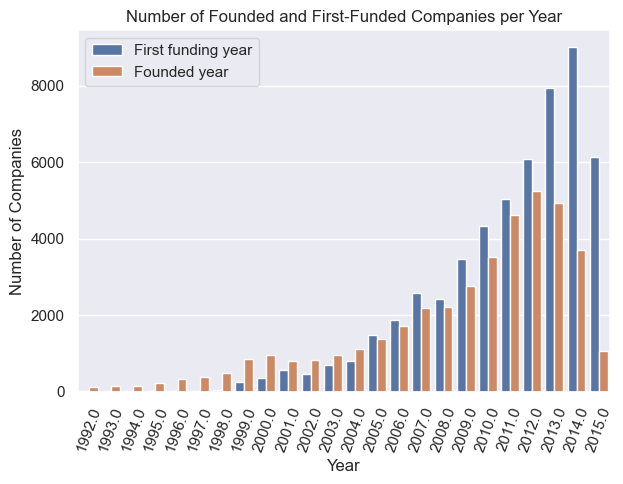

In [160]:
sns.barplot(data = startup_df_first_founded_stack.loc[(startup_df_first_founded_stack['value'] < 2024) & (startup_df_first_founded_stack['value'] > 1991), :],\
            x = 'value', y = 'index', hue = 'variable')
plt.xticks(rotation=70)
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Number of Companies")

plt.title('Number of Founded and First-Funded Companies per Year') 
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Number of Startup Industries over Time')

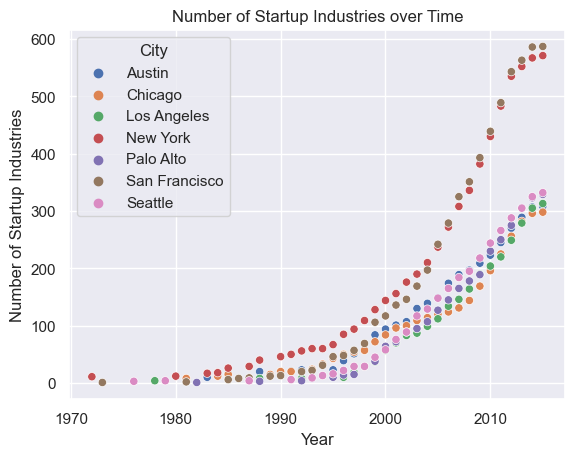

In [169]:
startup_df_categories_industry_city_count.loc[(startup_df_categories_industry_city_count['founded_year'] < 2024) & (startup_df_categories_industry_city_count['founded_year'] > 1970) , :].groupby(['city','founded_year'])[['category_city_counts']].max().reset_index()\
.rename(columns = {'city': 'City'})\
.pipe((sns.scatterplot, 'data'), x='founded_year', y='category_city_counts', hue = 'City')
sns.set_theme(style="darkgrid")

plt.xlabel("Year")
plt.ylabel("Number of Startup Industries")
plt.title("Number of Startup Industries over Time") 



/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



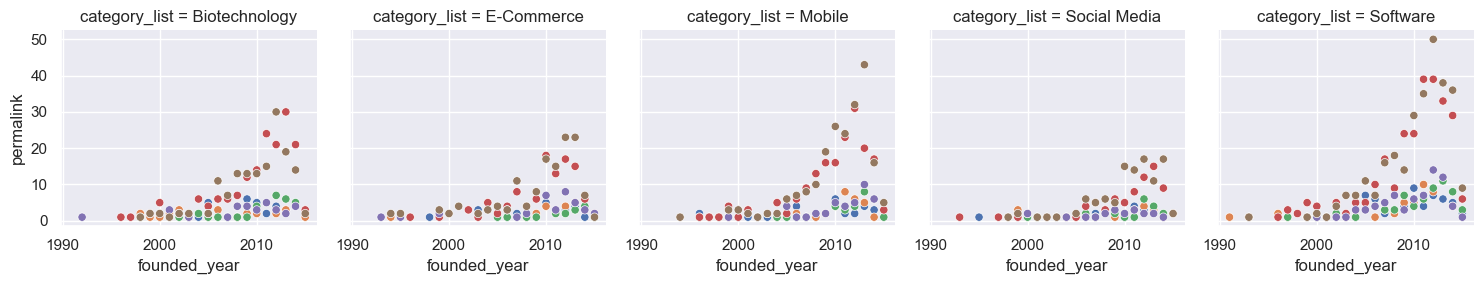

In [214]:
startup_df_categories_city_industy_founded = startup_df_categories.loc[(startup_df_categories['category_list'].isin(top_5_categories))\
                          & startup_df_categories['city'].isin(['Austin','Chicago','Los Angeles','New York','Palo Alto','San Francisco', 'Seatlle'])\
                          ,:]\
.groupby(['category_list','city','founded_year'])[['permalink']].count().reset_index()


g = sns.FacetGrid(data = startup_df_categories_city_industy_founded.loc[(startup_df_categories_city_industy_founded['founded_year'] < 2024) & (startup_df_categories_city_industy_founded['founded_year'] > 1990), :], col = 'category_list', palette = "Set3")
g.map(sns.scatterplot, 'founded_year','permalink','city')
